<p>
    <img src = "https://www.novaims.unl.pt/images/logo.png" width = 100>
    <b><font size = 6>Estudo da Influência do Campeão Nacional de Futebol no Produto Interno Bruto em Portugal</font></b>
</p>
<h2 align=left><font size = 4>Projecto Programing in Data Science | Enterprise Data Science and Analytics (2019)</font></h2>

*Autores: David Oliveira<sup>1</sup>, Filipe Marques<sup>2</sup>, Henrique Pereira<sup>3</sup> & Manuel Oom<sup>4</sup>*
1. *M20181430: M20181430@novaims.unl.pt*
2. *M20181391:  M20181391@novaims.unl.pt*
3. *M20181395: M20181395@novaims.unl.pt*
4. *M20181431: M20181431@novaims.unl.pt*

Este estudo tem por objectivo determinar se o facto de determinada equipa de futebol ganhar a liga nacional no ano em questão, tem ou não, alguma influência nos PIB do país. A premissa e lógica deste estudo é que empiricamente, os adeptos das equipas vencedoras, ficão mais confiantes na sua vida diária e mais dispostos quer a consumir mais, quer a produzir mais. Há que lembrar que há uma relação entre o volume de negócios relacionados com o futebol profissional e o PIB por exemplo (https://www.jn.pt/desporto/interior/futebol-profissional-contribui-com-456-milhoes-para-o-pib-9210445.html). Propomos aprofundar este possível fenómeno com os dados que fomos agregando.

In [1]:
#Importação das bibliotecas a serem usadas
#O ficheiro pre_processing_lib.py agrega todas as funções de carregamento, pré-processamento inicial e conversão de dados apenas
#com o fim de tornar este notebook mais legível
import pre_processing_lib as ppl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# I. Pré Processamento e Carregamento dos Dados
Os dados foram obtidos de várias fontes tendo como indexante o ano de declaração da vitória de determinada equipa na liga.

In [2]:
# Carregamento de datasets
futebol_zero_zero = ppl.get_champions('https://www.zerozero.pt/competicao_vencedores.php?id_comp=3')
transfermarkt_1,transfermarkt_2 = ppl.get_transfermarkt('https://www.transfermarkt.pt/liga-nos/besucherzahlenentwicklung/wettbewerb/PO1/plus/1','https://www.transfermarkt.pt/primeira-liga/ewigeTabelle/wettbewerb/PO1')
pib_per_capita = ppl.get_pib_per_capita('Datasets/pib_per_capita.xlsx')
taxa_crescimento_pib = ppl.get_pib_rate('Datasets/taxa_crescimento_pib.xlsx')
pop_grupo_etario,pop_grupo_etario_m,pop_grupo_etario_f,pop_genero = ppl.get_population_info('Datasets/populacao_grupo_etario.xlsx','Datasets/populacao_grupo_etario_masculino.xlsx','Datasets/populacao_grupo_etario_feminino.xlsx','Datasets/populacao_genero.xlsx')
visitors = ppl.get_visitors(r'Datasets\DESENVOLVIMENTO DOS NÚMEROS DE VISITANTES.xlsx')
euribor = ppl.get_euribor(r'Datasets\PORDATA_Taxas-de-juro-Euribor.xlsx')
psi20 = ppl.get_psi20(r'Datasets\PSI20.xlsx')
consumo_privado = ppl.get_consumo_privado(r'Datasets/consumoprivado_pib.xlsx')
inflacao = ppl.get_inflacao(r'Datasets/inflacao.xlsx')
desemprego_pct = ppl.get_desemprego_pct(r'Datasets/desemprego_percentagem.xlsx')
ganho_sexo = ppl.get_totalAnoGenero_Ganho(r'Datasets/ganho_por_sexo.xlsx')
rem_sexo = ppl.get_totalAnoGenero_Remuneracao(r'Datasets/remuneracao_por_sexo.xlsx')
rendPIB = ppl.get_rendimentoPIBpercent(r'Datasets/rendimento_empercentagem_pib.xlsx')

In [3]:
#Listagem dos dataframes de pandas carregados
%who_ls DataFrame

['consumo_privado',
 'desemprego_pct',
 'euribor',
 'futebol_zero_zero',
 'ganho_sexo',
 'inflacao',
 'pib_per_capita',
 'pop_genero',
 'pop_grupo_etario',
 'pop_grupo_etario_f',
 'pop_grupo_etario_m',
 'psi20',
 'rem_sexo',
 'rendPIB',
 'taxa_crescimento_pib',
 'transfermarkt_1',
 'transfermarkt_2',
 'visitors']

In [4]:
#Concatenação dos dados com base no index 'Ano'
#O index 'Ano', diz respeito ao ano em que a época termina, logo é o ano onde os possíveis efeitos do campeão se poderão fazer sentir
table_list = [futebol_zero_zero,pib_per_capita,taxa_crescimento_pib,pop_genero,
              visitors, euribor, psi20, ganho_sexo, rem_sexo, rendPIB, consumo_privado, 
              inflacao, desemprego_pct]
dataset = pd.concat(table_list, axis=1, join='outer', verify_integrity=True)

In [5]:
# Obtenção de uma amostra aleatória de 10% dos dados do nosso dataset com fins de visualização.
dataset.sample(frac=0.1, random_state = 100)

,AnoInicio,EquipaVencedora,NrConquistas,PIB_per_capita,Tx_Cresc_Real_PIB,TotalPop,PopMasculino,PopFeminino,Epoca,Jogos,...,Inflacao_Saúde,Inflacao_Transportes,Inflacao_Comunicações,Inflacao_Lazer_recreação_cultura,Inflacao_Educação,Inflacao_Restaurantes_hotéis,Inflacao_Bens_serviços_diversos,DesempregoPCT_Total,DesempregoPCT_Masculino,DesempregoPCT_Feminino
Ano,,,,,,,,,,,,,,,,,,,,,
2008,2007.0,FC Porto,23.0,16941.6,0.20,10563000.0,5066000.0,5497000.0,07/08,240.0,...,0.014,0.015,-0.021,0.006,0.042,0.037,0.026,0.076,0.065,0.087
2013,2012.0,FC Porto,27.0,16282.3,-1.13,10427000.0,4958000.0,5469000.0,12/13,240.0,...,0.015,-0.023,0.005,0.004,0.012,0.017,-0.006,0.162,0.160,0.164
1989,1988.0,Benfica,28.0,4691.2,6.65,9996000.0,4819000.0,5177000.0,NaN,NaN,...,0.120,0.093,0.036,0.068,0.163,0.170,0.175,0.050,0.034,0.070
1957,1956.0,Benfica,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,2014.0,Benfica,34.0,17359.3,1.82,10341000.0,4902000.0,5440000.0,14/15,306.0,...,0.004,-0.010,0.041,-0.006,0.007,0.013,0.004,0.124,0.122,0.127
1940,1939.0,FC Porto,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,1977.0,FC Porto,6.0,523.0,6.17,9609000.0,4609000.0,5000000.0,NaN,NaN,...,0.178,0.195,0.379,0.139,0.172,0.267,0.419,NaN,NaN,NaN
1946,1945.0,Belenenses,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dos 85 registos é possível verificar que existe necessidade de truncar com base na variável dependente (alvo)
#e eliminar registos e variáveis com missing values 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 1935 to 2019
Data columns (total 50 columns):
AnoInicio                                                                             84 non-null float64
EquipaVencedora                                                                       84 non-null object
NrConquistas                                                                          84 non-null float64
PIB_per_capita                                                                        58 non-null float64
Tx_Cresc_Real_PIB                                                                     58 non-null float64
TotalPop                                                                              58 non-null float64
PopMasculino                                                                          58 non-null float64
PopFeminino                                                                           58 non-null float64
Epoca                                        

Como os dados não abragem todos os anos em análise, iremos verificar para cada variável o número de anos disponíveis a fim de seleccionar secções temporais para análise.

In [7]:
# Para cada variável obter o primeiro e o último ano com dados válidos (MinAno e MaxAno)
dataset_transpose = dataset.transpose()

max = pd.Series()
min = pd.Series()
for attr in dataset_transpose.index:
    min[attr] = dataset.loc[:,attr].first_valid_index()
    max[attr] = dataset.loc[:,attr].last_valid_index()

dataset_index_notnull = dataset_transpose.copy()
dataset_index_notnull['MinAno'] = min
dataset_index_notnull['MaxAno'] = max
dataset_index_notnull=dataset_index_notnull.loc[:,['MinAno', 'MaxAno']]
dataset_index_notnull.index.names = ['Variavel']
dataset_index_notnull.columns.names = ['']
dataset_index_notnull['RangeAnos'] = dataset_index_notnull.MaxAno - dataset_index_notnull.MinAno + 1
dataset_index_notnull

,MinAno,MaxAno,RangeAnos
Variavel,,,
AnoInicio,1935,2018,84
EquipaVencedora,1935,2018,84
NrConquistas,1935,2018,84
PIB_per_capita,1960,2017,58
Tx_Cresc_Real_PIB,1961,2018,58
TotalPop,1960,2017,58
PopMasculino,1960,2017,58
PopFeminino,1960,2017,58
Epoca,2003,2019,17


In [8]:
# Ilustra o período em que temos dados sobre equipas vencedoras de cameonatos e algumas das variáveis
#com aparente maior potêncial para explicar a variação do PIB (1999-2018)
dataset_index_notnull.loc[['Tx_Cresc_Real_PIB', 'PSI20_Variacao', 'Inflacao_Total',
                           'DesempregoPCT_Total', 'Euribor 3 meses', 'EquipaVencedora'],:]

,MinAno,MaxAno,RangeAnos
Variavel,,,
Tx_Cresc_Real_PIB,1961,2018,58
PSI20_Variacao,1993,2019,27
Inflacao_Total,1978,2018,41
DesempregoPCT_Total,1983,2018,36
Euribor 3 meses,1999,2017,19
EquipaVencedora,1935,2018,84


A variável alvo (dependente) é a **Tx_Cresc_Real_PIB** e a nossa variável independente de interesse maior, conforme já establecido inicialmente na introdução é a **EquipaVencedora**.

Vamos analisar variável a variável a pertinência da sua inclusão e possíveis redundâncias:

In [9]:
#Descrição das variáveis quantitativas ordenando as mesmas pelos seus valores máximo e mínimo
dataset.describe().T.sort_values(by=['max', 'min'])

,count,mean,std,min,25%,50%,75%,max
DesempregoPCT_Masculino,36.0,6.777778e-02,0.035067,0.027,4.075000e-02,6.150000e-02,7.125000e-02,1.600000e-01
DesempregoPCT_Total,36.0,7.775000e-02,0.032000,0.039,5.375000e-02,7.150000e-02,8.600000e-02,1.620000e-01
DesempregoPCT_Feminino,36.0,9.011111e-02,0.030112,0.049,6.875000e-02,8.400000e-02,1.130000e-01,1.640000e-01
Inflacao_Restaurantes_hotéis,41.0,8.878049e-02,0.080473,0.010,2.400000e-02,4.600000e-02,1.540000e-01,2.670000e-01
Inflacao_Habitação_água_electricidade_gás_outros_combustíveis,41.0,8.021951e-02,0.067415,0.002,2.900000e-02,4.400000e-02,1.340000e-01,2.770000e-01
Inflacao_Saúde,41.0,7.690244e-02,0.074980,-0.014,1.500000e-02,5.300000e-02,1.240000e-01,2.800000e-01
Inflacao_Total,41.0,7.692683e-02,0.078994,-0.008,2.300000e-02,3.600000e-02,1.250000e-01,2.850000e-01
Inflacao_Educação,41.0,1.000244e-01,0.084859,-0.051,3.500000e-02,8.800000e-02,1.630000e-01,2.860000e-01
Inflacao_Total_excepto_produtos_alimentares_não_transformados_produtos_energéticos,41.0,7.685366e-02,0.077712,0.001,2.100000e-02,3.500000e-02,1.310000e-01,2.860000e-01
Inflacao_Acessórios_para_o_lar_equipamento_doméstico_manutenção_corrente_habitação,41.0,6.800000e-02,0.080641,-0.005,1.500000e-02,2.500000e-02,9.700000e-02,2.990000e-01


A fim de simplificação do nosso dataset, eliminamos as variáveis que são redundantes e as que não são pertinentes, e depois aplicamos transformação em duas variáveis para adatpar a sua escala de valores.

In [10]:
#Eliminação de variáveis
dataset_F = dataset.drop(['PopMasculino', 'PopFeminino', 'PIB_per_capita', 'PSI20_Alta', 'PSI20_Abertura', 'PSI20_Volume',
                         'PSI20_Ultimo', 'PSI20_Baixa', 'AnoInicio', 'MediaEspetadores', 'MaxEspetadores', 'MascIncome',
                         'TotalIncome', 'MascOrdenado', 'FemIncome', 'TotalOrdenado', 'FemOrdenado',
                         'FlagEsgotado', 'RendBrutoPCT_PIB', 'Inflacao_Bebidas_alcoólicas_e_tabaco', 'Inflacao_Bens_serviços_diversos',
                         'Inflacao_Comunicações', 'Inflacao_Vestuário_calçado', 'Inflacao_Transportes',
                         'Inflacao_Produtos_alimentares_bebidas_não_alcoólicas', 'Inflacao_Acessórios_para_o_lar_equipamento_doméstico_manutenção_corrente_habitação',
                         'Inflacao_Total_excepto_produtos_alimentares_não_transformados_produtos_energéticos', 'Inflacao_Educação',
                         'Inflacao_Saúde', 'Inflacao_Habitação_água_electricidade_gás_outros_combustíveis',
                         'Inflacao_Restaurantes_hotéis', 'DesempregoPCT_Feminino', 'DesempregoPCT_Masculino', 'NrConquistas', 'Epoca',
                         'Equipa', 'TotalEspetadores', 'Jogos'], axis=1)

#Transformação de variáveis
dataset_F.TotalPop = np.log10(dataset.TotalPop)
dataset_F.PSI20_Variacao = (dataset.PSI20_Variacao)/10
dataset_F.rename(columns={'TotalPop':'TotalPop_Log', 'PSI20_Variacao':'PSI20_Variacao10x'}, inplace=True)

# Eliminar linha de 2019, uma vez que não temos dados do PIB para esse ano
dataset_F.drop(2019, inplace=True)

# Descrição do dataset final
dataset_F.describe().T.sort_values(by=['count','max', 'min'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Tx_Cresc_Real_PIB,58.0,3.186552,3.370719,-5.100000,1.572500,2.855000,4.887500,10.530000
TotalPop_Log,58.0,6.990482,0.029192,6.935709,6.959412,7.000108,7.014457,7.024198
RendDisponivelPCT_PIB,58.0,1.024655,0.029301,0.969000,0.996250,1.028000,1.048500,1.078000
Consumo_Privado_em_Pct_PIB,58.0,0.652086,0.021737,0.605000,0.635000,0.648500,0.661500,0.719000
Inflacao_Lazer_recreação_cultura,41.0,0.064146,0.078120,-0.016000,0.009000,0.023000,0.095000,0.307000
Inflacao_Total,41.0,0.076927,0.078994,-0.008000,0.023000,0.036000,0.125000,0.285000
DesempregoPCT_Total,36.0,0.077750,0.032000,0.039000,0.053750,0.071500,0.086000,0.162000
PSI20_Variacao10x,26.0,0.512462,2.639405,-5.129000,-1.212500,0.972500,1.619750,7.106000
Euribor 3 meses,19.0,1.856842,1.692612,-0.330000,0.240000,2.120000,3.090000,4.860000
Euribor 6 meses,19.0,1.955789,1.657774,-0.270000,0.355000,2.170000,3.115000,4.830000


A variável categórica é a equipa vencedora do campeonato e tem as seguintes características:

In [11]:
dataset_F.describe(include=['O']).T

,count,unique,top,freq
EquipaVencedora,84,5,Benfica,36


In [12]:
dataset_F['EquipaVencedora'].value_counts()

Benfica        36
FC Porto       28
Sporting       18
Boavista        1
Belenenses      1
Name: EquipaVencedora, dtype: int64

In [13]:
# Resumo do dataset final por variávies
dataset_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1935 to 2018
Data columns (total 12 columns):
EquipaVencedora                     84 non-null object
Tx_Cresc_Real_PIB                   58 non-null float64
TotalPop_Log                        58 non-null float64
Euribor 3 meses                     19 non-null float64
Euribor 6 meses                     19 non-null float64
Euribor 12 meses                    19 non-null float64
PSI20_Variacao10x                   26 non-null float64
RendDisponivelPCT_PIB               58 non-null float64
Consumo_Privado_em_Pct_PIB          58 non-null float64
Inflacao_Total                      41 non-null float64
Inflacao_Lazer_recreação_cultura    41 non-null float64
DesempregoPCT_Total                 36 non-null float64
dtypes: float64(11), object(1)
memory usage: 8.5+ KB


# II. Análise de Datasets de 3 períodos temporais
De seguida iremos criar, analisar e visualizar dados de 3 períodos temporais dos nosso dataset original. Sendo que o nosso objectivo é determinar se existe e qual o efeito que uma determinada equipa (variável categórica independente) que vence um campeonato tem na variação do PIB (variável dependente), temos de eliminar os missing values das nossas variáveis dependentes de interesse.
O ano de 2019 ainda não está determinado o vencedor nem iremos ter dados de PIB ou a variação deste até o termino desse ano.

## II.1. Dataset truncado a 57 anos de dados

Analizando os missing values verificamos a necessidade de efectuar algumas truncagens no dataset.
O principal alvo será o **Tx_Cresc_Real_PIB**.

In [14]:
# Eliminação dos missing values tendo por base a Taxa de crescimento real do PIB
dataset_F.dropna(subset=['Tx_Cresc_Real_PIB'], inplace=True)

In [15]:
dataset_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1961 to 2018
Data columns (total 12 columns):
EquipaVencedora                     58 non-null object
Tx_Cresc_Real_PIB                   58 non-null float64
TotalPop_Log                        57 non-null float64
Euribor 3 meses                     19 non-null float64
Euribor 6 meses                     19 non-null float64
Euribor 12 meses                    19 non-null float64
PSI20_Variacao10x                   26 non-null float64
RendDisponivelPCT_PIB               57 non-null float64
Consumo_Privado_em_Pct_PIB          57 non-null float64
Inflacao_Total                      41 non-null float64
Inflacao_Lazer_recreação_cultura    41 non-null float64
DesempregoPCT_Total                 36 non-null float64
dtypes: float64(11), object(1)
memory usage: 5.9+ KB


Verificando mais variáveis cuja densidade de missing values é superior ao desejável encontramos as seguintes com um cutoff de < 3% em missing values do dataset global. Isto é, considerando todas as variáveis presentes, há algumas que têm um número significativo de missing values que pela função seguinte iremos retirar.

In [16]:
clean_data57 = dataset_F.drop(dataset_F.columns[dataset_F.isna().sum() > len(dataset_F)*0.03], axis=1)
clean_data57.dropna(inplace=True)
clean_data57.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1961 to 2017
Data columns (total 5 columns):
EquipaVencedora               57 non-null object
Tx_Cresc_Real_PIB             57 non-null float64
TotalPop_Log                  57 non-null float64
RendDisponivelPCT_PIB         57 non-null float64
Consumo_Privado_em_Pct_PIB    57 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


### II.1.1. Criação do Dataset a 57 anos com *Dummies*
Transformar a variável categórica da equipa vencedora em *dummies* para melhor conseguir correlacionar, será uma abordagem a não descartar. Após esta abordagem, limitamos os missing values aos dados que temos ficando um dataset limpo com **56 épocas** ao todo.

In [17]:
# Criação de variáveis dummies com renomeação
d_equipas = pd.get_dummies(clean_data57.EquipaVencedora).rename(columns=lambda x: 'EquipaVencedora_' + str(x).replace(' ','')).astype(int)
clean_data57_d = pd.concat([clean_data57, d_equipas], axis=1)

# Eliminação da variável dummie correspondente ao boavista por esta equipa ter poucas vitórias e a fim de simplificar
clean_data57_d.drop(['EquipaVencedora_Boavista','EquipaVencedora'], axis=1, inplace=True)
clean_data57_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1961 to 2017
Data columns (total 7 columns):
Tx_Cresc_Real_PIB             57 non-null float64
TotalPop_Log                  57 non-null float64
RendDisponivelPCT_PIB         57 non-null float64
Consumo_Privado_em_Pct_PIB    57 non-null float64
EquipaVencedora_Benfica       57 non-null int32
EquipaVencedora_FCPorto       57 non-null int32
EquipaVencedora_Sporting      57 non-null int32
dtypes: float64(4), int32(3)
memory usage: 2.9 KB


### II.1.2. Visualização Dados a 57 anos

Iremos verificar a correlação global entre as variáveis no periodo seleccionado de 56 anos, juntando também as variáveis dummies das equipas vencedoras.

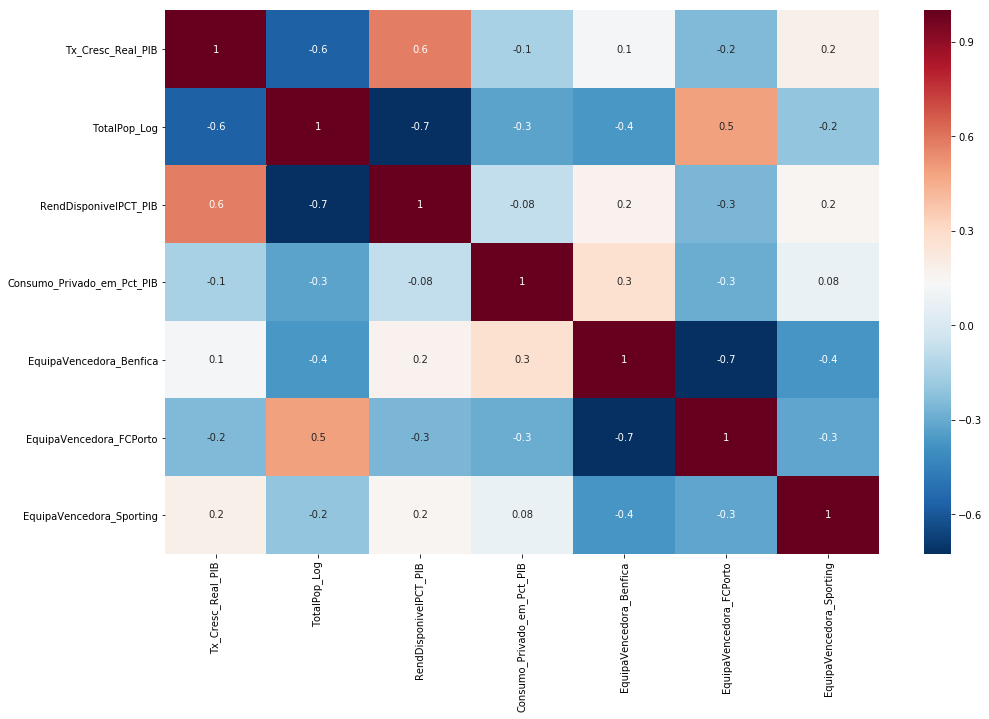

In [18]:
corr_d = clean_data57_d.corr()
figure = plt.figure(figsize=(16,10))
hp57anos = sns.heatmap(corr_d, annot=True, fmt = '.1g', cmap="RdBu_r")
hp57anos.get_figure().savefig('57anos_heatmap.png', transparent=True, bbox_inches='tight')
plt.show()

Iremos verificar a correlação global visual entre as variáveis no periodo seleccionado de 56 anos, a fim de perceber melhor as correlações do ponto anterior.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1152x720 with 0 Axes>

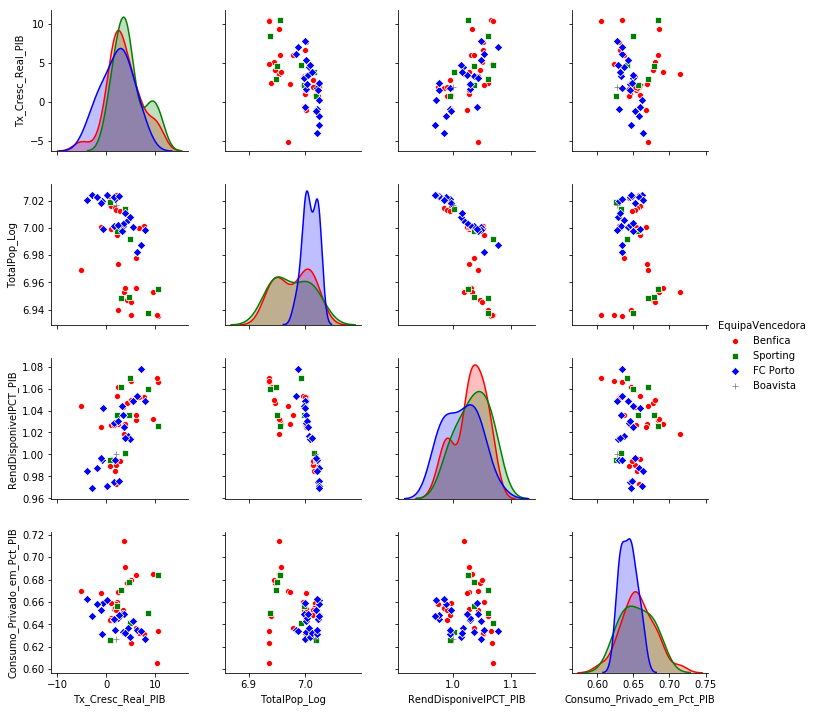

In [19]:
plt.figure(figsize=(16,10))
cores = {'Sporting ':'g','Benfica ':'r','FC Porto ':'b','Boavista ':'grey'}
pp56anos = sns.pairplot(clean_data57, hue='EquipaVencedora', palette=cores, kind='scatter', markers=["o", "s", "D", "+"])
pp56anos.savefig('57anos_pairplot.png', transparent=True, bbox_inches='tight')
plt.show()

Pelos gráficos é possível perceber em termos de tendência, que existe alguma variação na área do consumo privado a variável **'Consumo_Privado_em_Pct_PIB'** e a **'RendDisponivelPCT_PIB'**. Começamos por visualizar de uma forma isolada as variáveis anteriormente seleccionadas a fim de tentar perceber o que podemos descobrir.

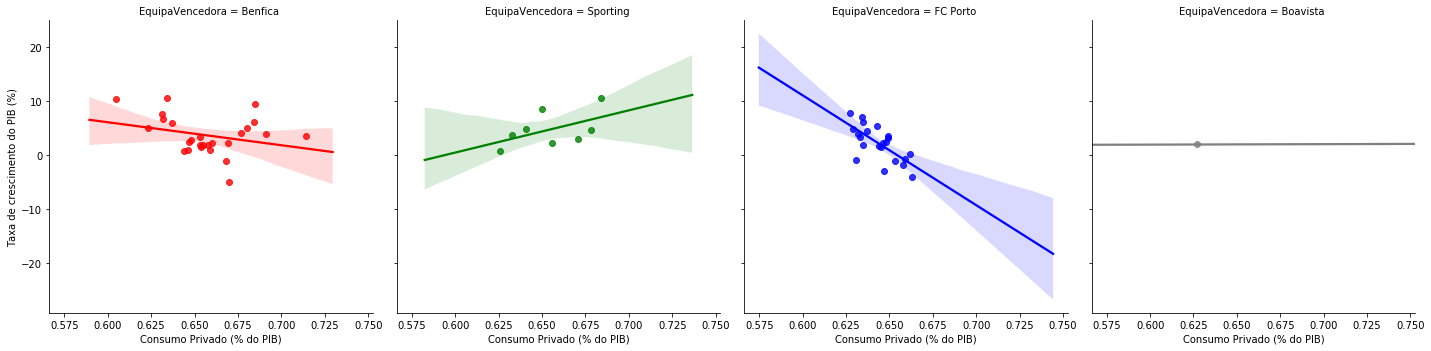

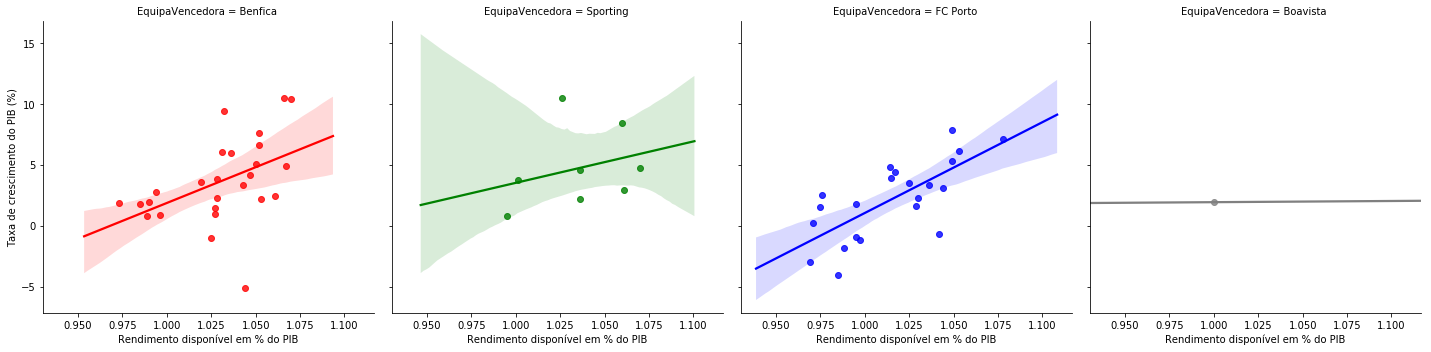

In [20]:
g1 = sns.lmplot(x='Consumo_Privado_em_Pct_PIB', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data57, palette=cores)\
    .set_axis_labels('Consumo Privado (% do PIB)', 'Taxa de crescimento do PIB (%)')\
    .savefig('57anos_parConsumo.png', transparent=True, bbox_inches='tight')

g2 = sns.lmplot(x='RendDisponivelPCT_PIB', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data57, palette=cores)\
    .set_axis_labels('Rendimento disponível em % do PIB', 'Taxa de crescimento do PIB (%)')\
    .savefig('57anos_parRend.png', transparent=True, bbox_inches='tight')

É possível verificar que, quando o **FC Porto** ganhou campeonatos, existe uma correlação negativa que mostra que um aumento do consumo privado o PIB tem uma taxa de variação inferior. Já no caso de campeonatos ganhos pelo **Sporting** verifica-se o contrário. Já no caso do **Benfica** verifica-se a correlação negativa do FC Porto mas menos intensa.

Já comparando a taxa de crescimento do PIB com as vitórias destes clubes consoante o Rendimento disponível em % do PIB nos anos em questão, pode-se inferir que em todos os casos, a taxa de crescimento do PIB é mais positiva quando a o Rendimento ultrapassa o PIB, o que tem lógica do ponto de vista económico. Não parece haver uma diferenciação entre equipas.

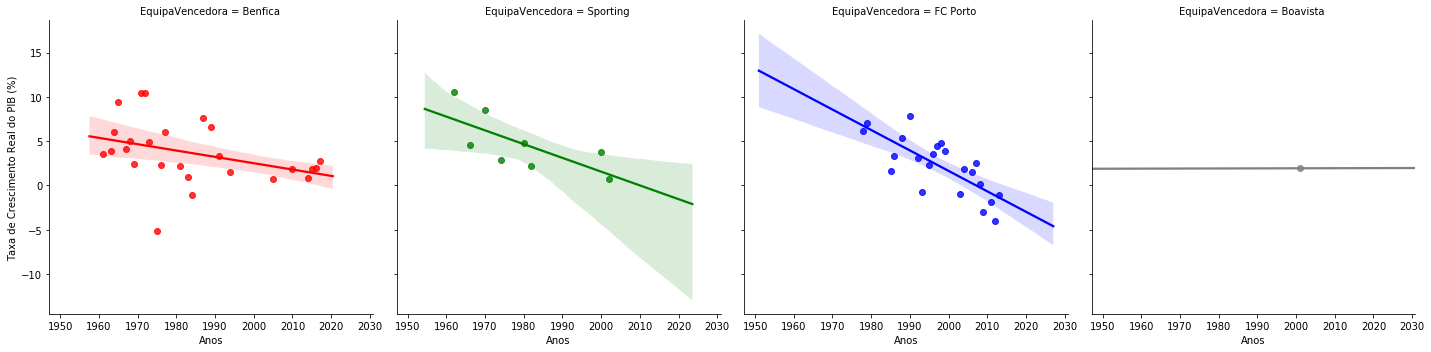

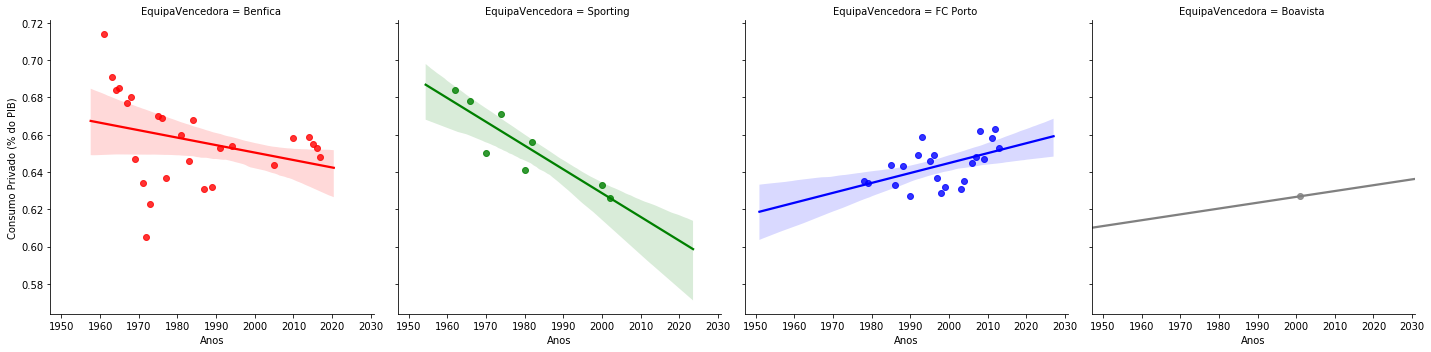

In [21]:
g1 = sns.lmplot(x='Ano', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data57.reset_index(), palette=cores)\
    .set_axis_labels('Anos', 'Taxa de Crescimento Real do PIB (%)')\
    .savefig('57anos_parCresPIB_Tempo.png', transparent=True, bbox_inches='tight')
    
g2 = sns.lmplot(x='Ano', y='Consumo_Privado_em_Pct_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data57.reset_index(), palette=cores)\
    .set_axis_labels('Anos', 'Consumo Privado (% do PIB)')\
    .savefig('57anos_parConsumo_Tempo.png', transparent=True, bbox_inches='tight')

Em qualquer um dos casos, o PIB aumentou ao longo dos anos. Também a tendência da taxa de crescimento tem sido negativa ao longo dos anos, mas no caso dos anos de vitórias do **FC Porto** tem sido mais acentuado do que por exemplo o **Benfica**, tendo em conta que estes têm dividido os campeonatos nos desde o início do século, mas também tendo em conta que as vitórias do **FC Porto** coincidiram mais com anos de crise económica.

Verificando a variação do consumo privado, apenas o **FC Porto** mostra uma associação positiva com as suas vitórias. No caso do **Benfica** a variância é maior pelo que não se consegue obter muitas conclusões.

## II.2. Dataset truncado a 25 anos de dados

Iremos truncar os dados a **25 anos** com base nas variáveis do **PSI20**. Queremos confirmar se estas têm alguma correlação com o que pretendemos descobrir.

Analizando os missing values verificamos a necessidade de efectuar algumas truncagens no dataset.
O principal alvo será o Tx_Cresc_Real_PIB juntamente com as variáveis do PIB.

In [22]:
dataset_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1961 to 2018
Data columns (total 12 columns):
EquipaVencedora                     58 non-null object
Tx_Cresc_Real_PIB                   58 non-null float64
TotalPop_Log                        57 non-null float64
Euribor 3 meses                     19 non-null float64
Euribor 6 meses                     19 non-null float64
Euribor 12 meses                    19 non-null float64
PSI20_Variacao10x                   26 non-null float64
RendDisponivelPCT_PIB               57 non-null float64
Consumo_Privado_em_Pct_PIB          57 non-null float64
Inflacao_Total                      41 non-null float64
Inflacao_Lazer_recreação_cultura    41 non-null float64
DesempregoPCT_Total                 36 non-null float64
dtypes: float64(11), object(1)
memory usage: 5.9+ KB


Truncamos à variação do PSI20, de seguida verificando mais variáveis cuja densidade de missing values é superior ao desejável encontramos as seguintes com um cutoff de < 3% em missing values do dataset global:

In [23]:
clean_data25 = dataset_F[~dataset_F.PSI20_Variacao10x.isnull()].copy()
clean_data25.dropna(subset=['Consumo_Privado_em_Pct_PIB'], inplace=True)
clean_data25.drop(clean_data25.columns[clean_data25.isna().sum() > len(clean_data25)*0.03], axis=1, inplace=True)
clean_data25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1993 to 2017
Data columns (total 9 columns):
EquipaVencedora                     25 non-null object
Tx_Cresc_Real_PIB                   25 non-null float64
TotalPop_Log                        25 non-null float64
PSI20_Variacao10x                   25 non-null float64
RendDisponivelPCT_PIB               25 non-null float64
Consumo_Privado_em_Pct_PIB          25 non-null float64
Inflacao_Total                      25 non-null float64
Inflacao_Lazer_recreação_cultura    25 non-null float64
DesempregoPCT_Total                 25 non-null float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


### II.2.1. Criação do Dataset a 25 anos com *Dummies*
Transformar a variável categórica da equipa vencedora em *dummie*s para melhor conseguir correlacionar, será uma abordagem a não descartar. Após esta abordagem, limitamos os missing values aos dados que temos ficando um dataset limpo com **25 épocas** ao todo.

In [24]:
d_equipas = pd.get_dummies(clean_data25.EquipaVencedora).rename(columns=lambda x: 'EquipaVencedora_' + str(x).replace(' ','')).astype(int)
clean_data25_d = pd.concat([clean_data25, d_equipas], axis=1)
clean_data25_d.drop(['EquipaVencedora', 'EquipaVencedora_Boavista'], inplace=True, axis=1)

### II.2.2. Visualização Dados a 25 anos
Iremos verificar a correlação global entre as variáveis no periodo seleccionado de 25 anos, juntando também as variáveis dummies das equipas vencedoras

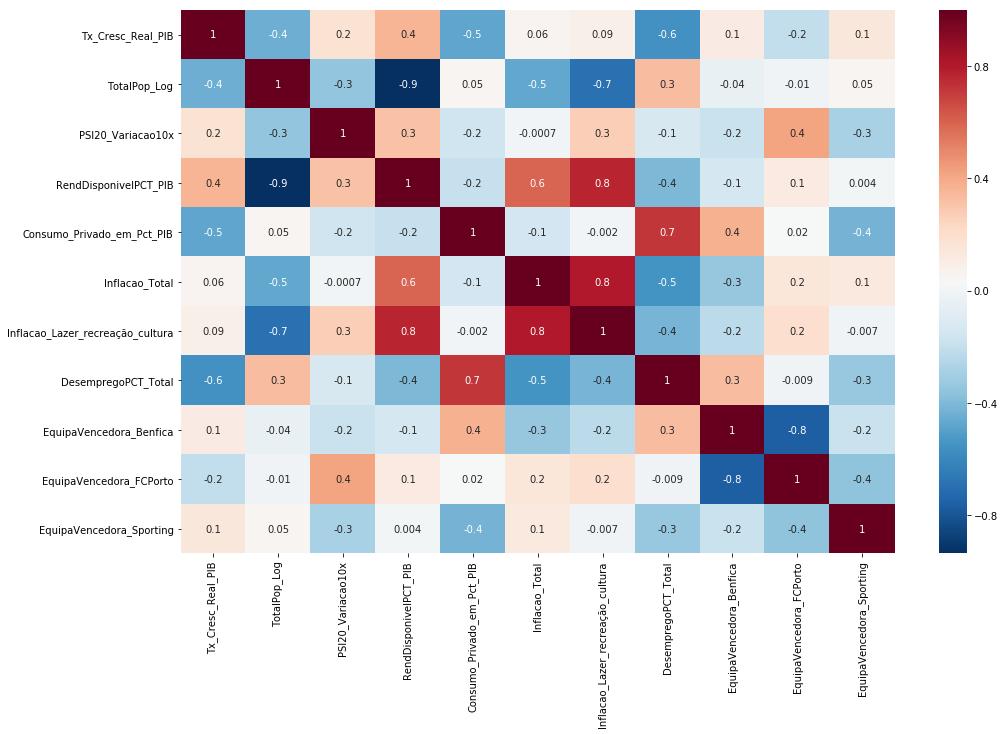

In [25]:
corr_d = clean_data25_d.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(corr_d, annot=True, fmt = '.1g', cmap="RdBu_r")\
    .get_figure().savefig('25anos_heatmap.png', transparent=True, bbox_inches='tight')
plt.show()

Iremos verificar a correlação global visual entre as variáveis no periodo seleccionado de 26 anos, a fim de perceber melhor as correlações do ponto anterior.

<Figure size 1152x720 with 0 Axes>

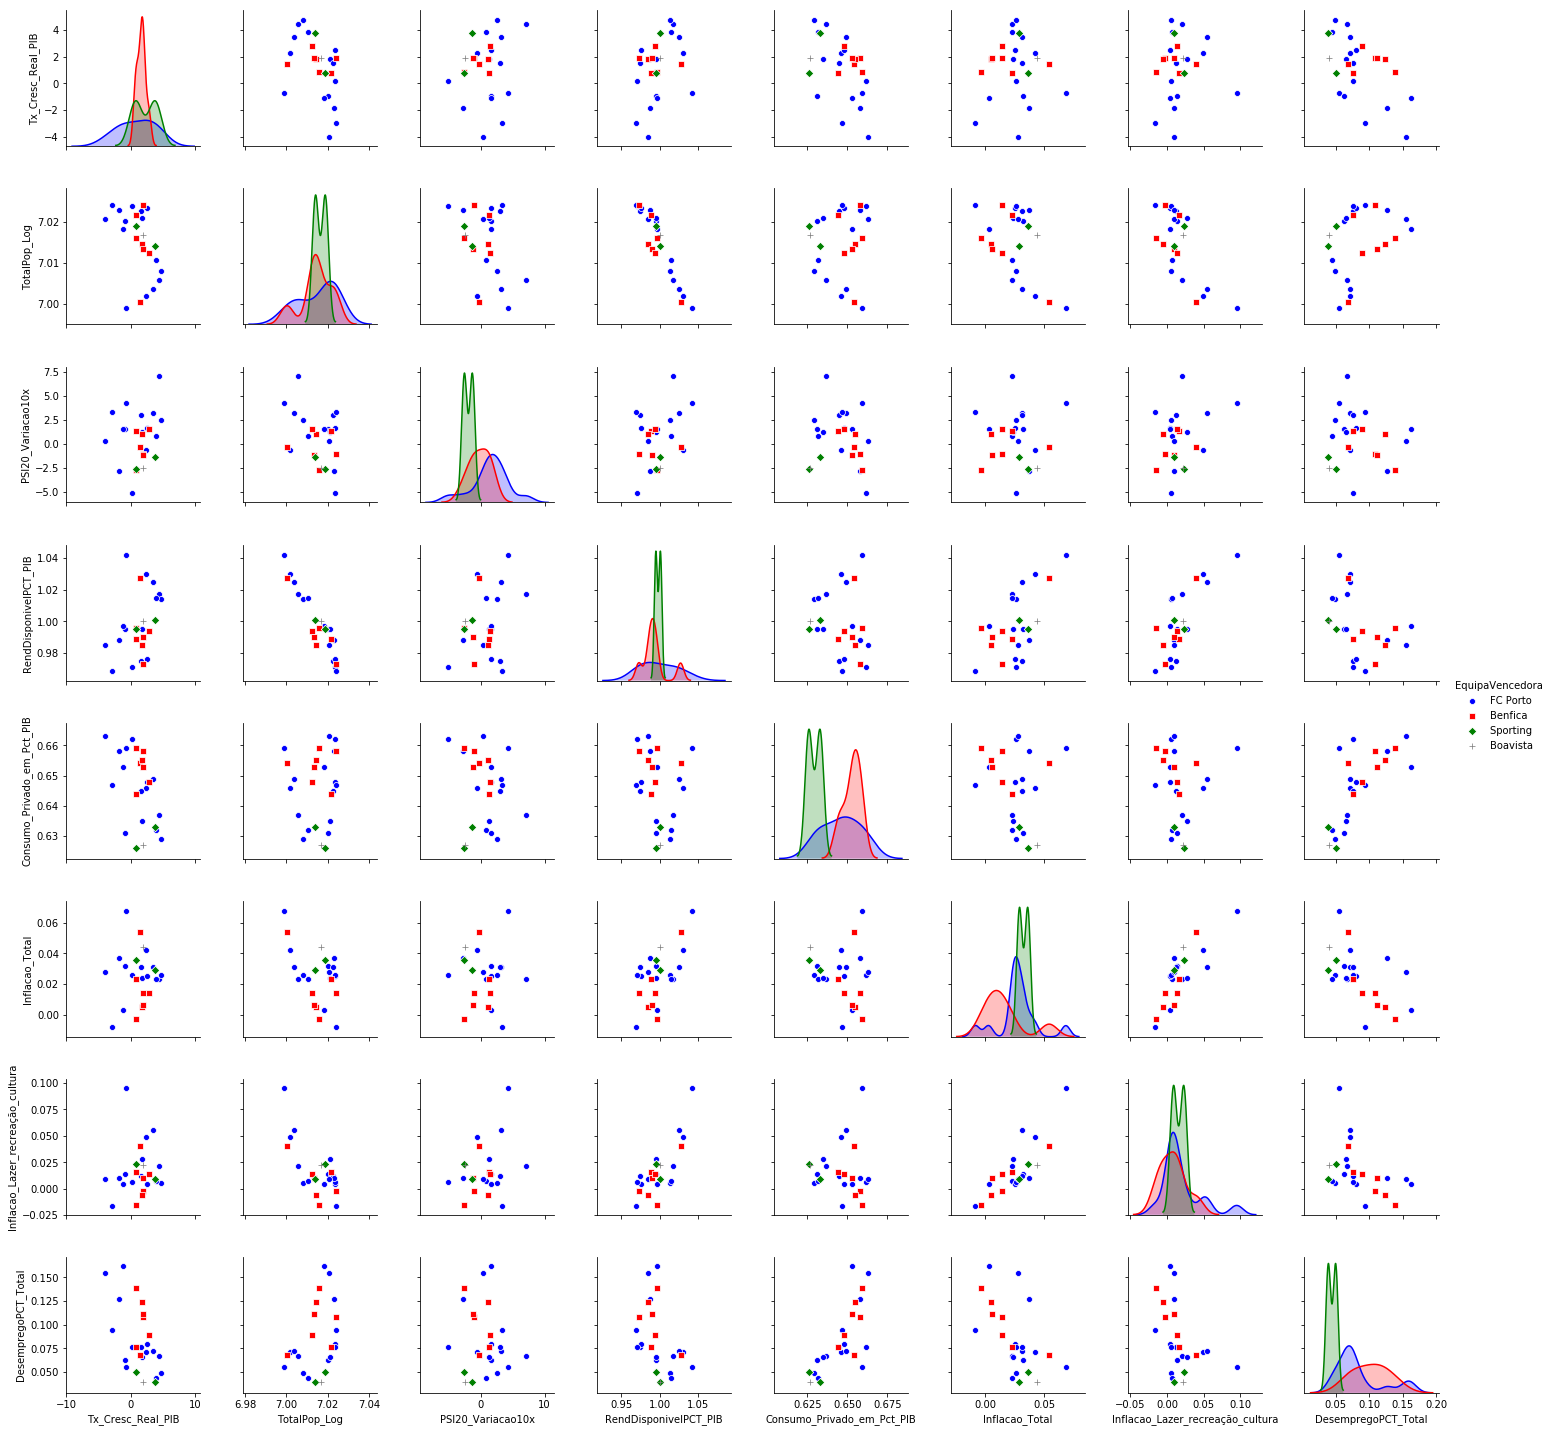

In [26]:
figure = plt.figure(figsize=(16,10))
cores = {'Sporting ':'g','Benfica ':'r','FC Porto ':'b','Boavista ':'grey'}
sns.pairplot(clean_data25, hue='EquipaVencedora', palette=cores, kind='scatter', markers=["o", "s", "D", "+"])\
    .savefig('25anos_pairplot.png', transparent=True, bbox_inches='tight')
plt.show()

Dos gráficos e do heatmap acima, é possível tirar verificar o seguinte:

No caso do **Benfica** como equipa vencedora, temos correlação negativa com todas as variáveis à excepção das variáveis 'Tx_Cresc_Real_PIB', 'Consumo_privado_pct_PIB', e 'Desemprego_pct_total'.

No caso do **FC Porto** como equipa vencedora, conseguimos ver menor número de correlações negativas com as variáveis e apenas algumas positivas e relevantes como é o caso das variáveis 'PSI20_variação', 'Inflacao_Total'. 

No caso do **Sporting** como equipa vencedora, verificamos correlação relevante com o 'Desemprego_pct_total' e 'Consumo_privado_pct_PIB'.

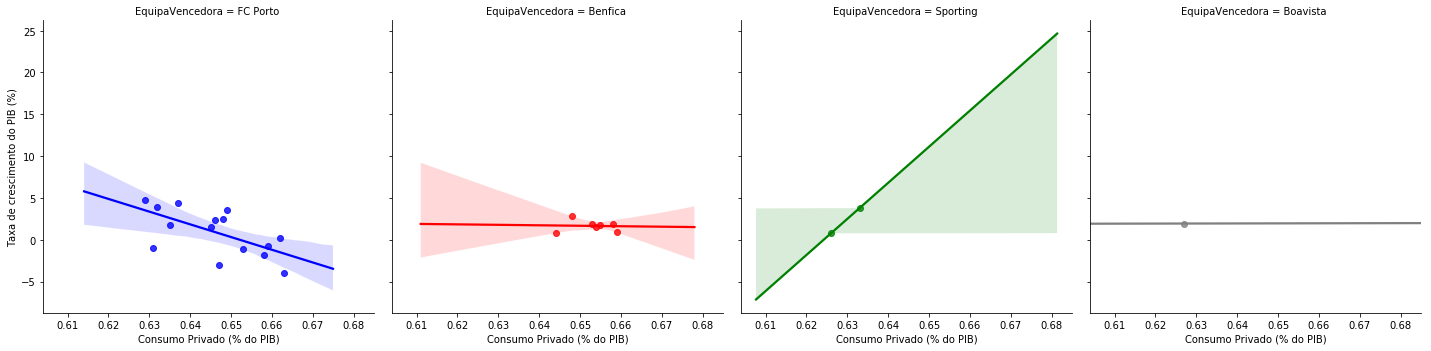

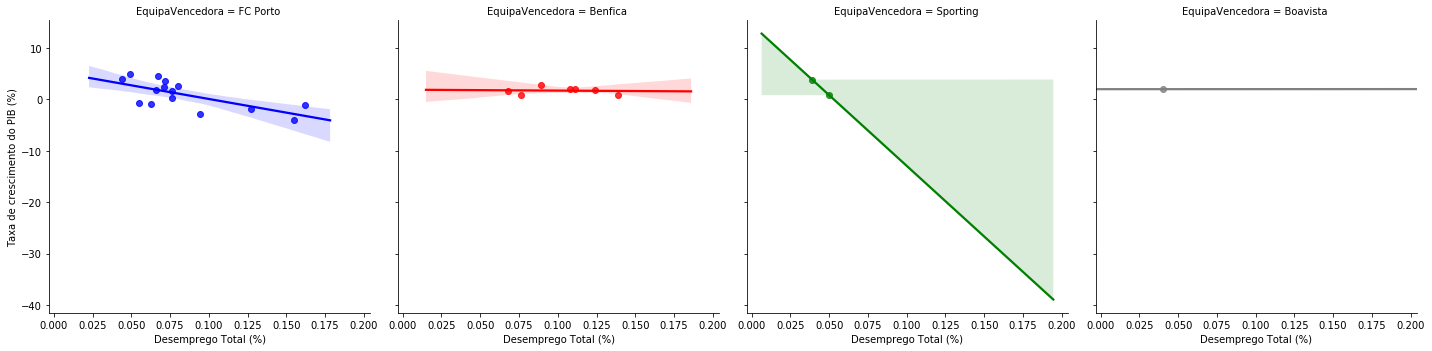

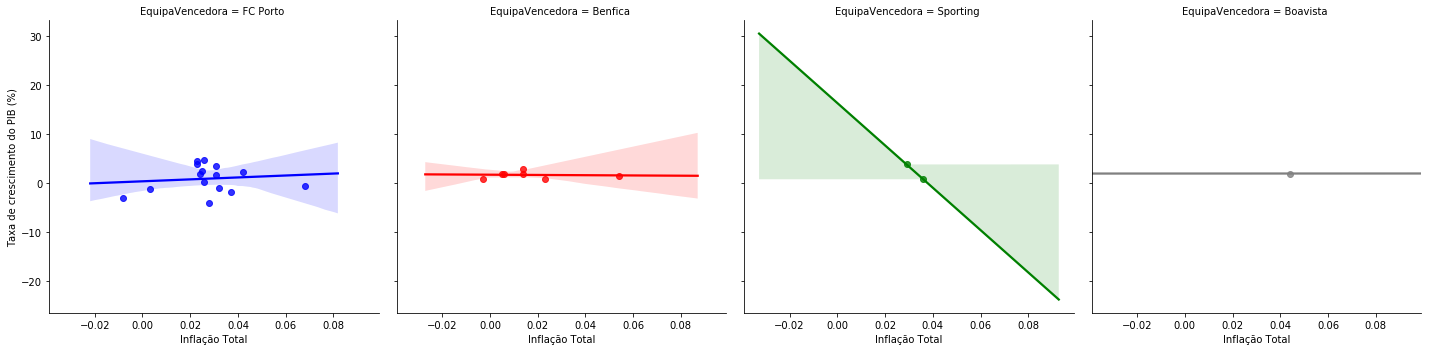

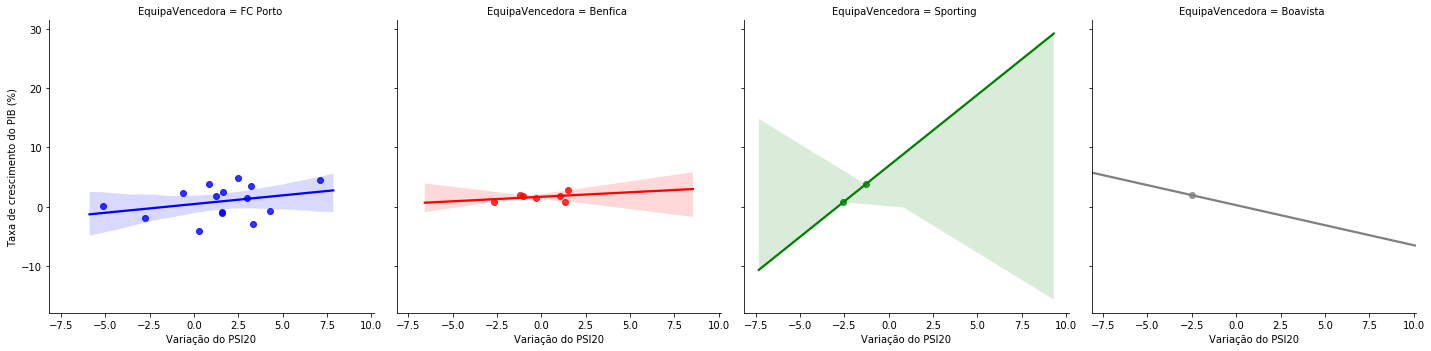

In [27]:
g1 = sns.lmplot(x='Consumo_Privado_em_Pct_PIB', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25, palette=cores)\
    .set_axis_labels('Consumo Privado (% do PIB)', 'Taxa de crescimento do PIB (%)')\
    .savefig('25anos_parConsumo.png', transparent=True, bbox_inches='tight')

g2 = sns.lmplot(x='DesempregoPCT_Total', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25, palette=cores)\
    .set_axis_labels('Desemprego Total (%)', 'Taxa de crescimento do PIB (%)')\
    .savefig('25anos_parDesemprego.png', transparent=True, bbox_inches='tight')

g3 = sns.lmplot(x='Inflacao_Total', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25, palette=cores)\
    .set_axis_labels('Inflação Total', 'Taxa de crescimento do PIB (%)')\
    .savefig('25anos_parInflacao.png', transparent=True, bbox_inches='tight')

g4 = sns.lmplot(x='PSI20_Variacao10x', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25, palette=cores)\
    .set_axis_labels('Variação do PSI20', 'Taxa de crescimento do PIB (%)')\
    .savefig('25anos_parPSI20Var.png', transparent=True, bbox_inches='tight')

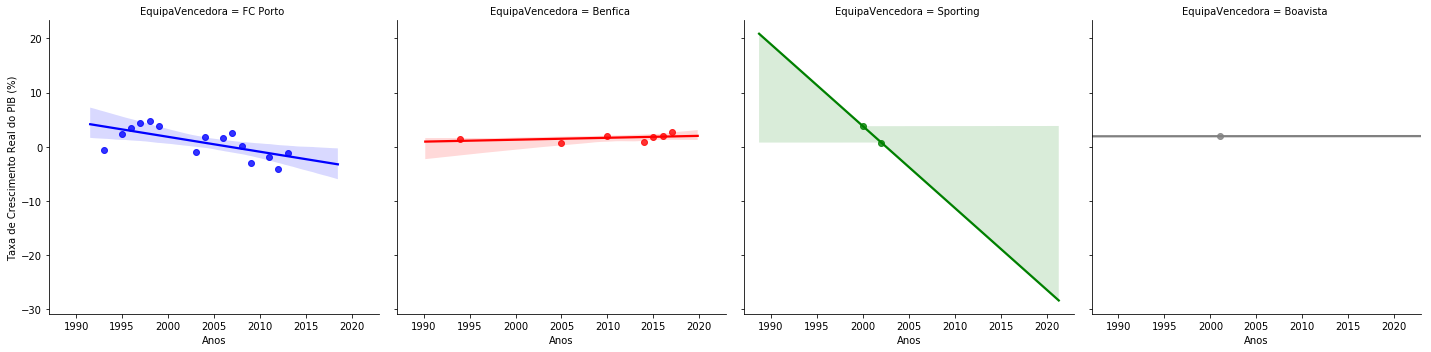

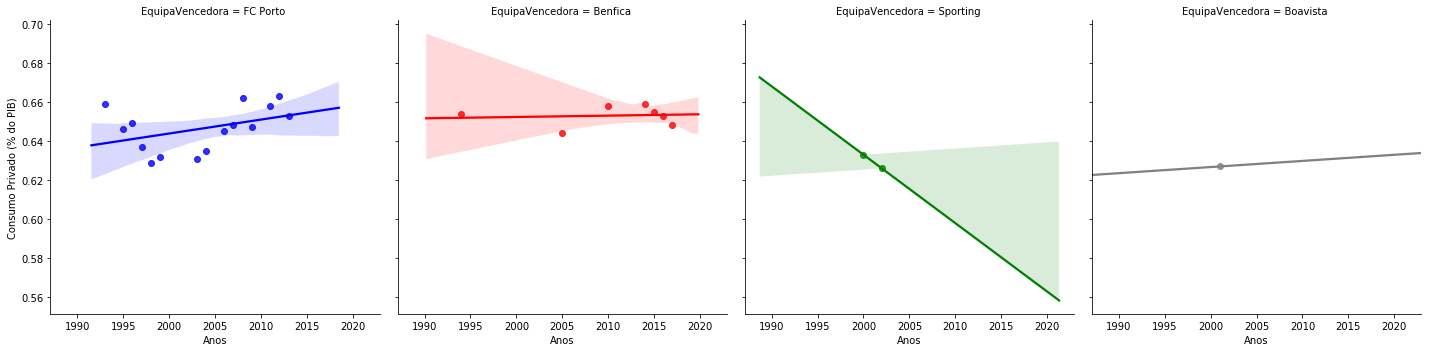

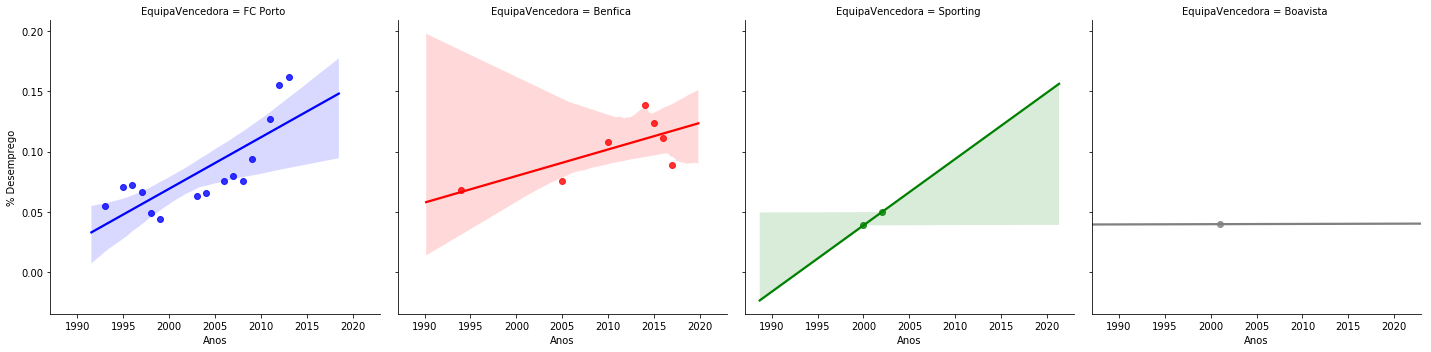

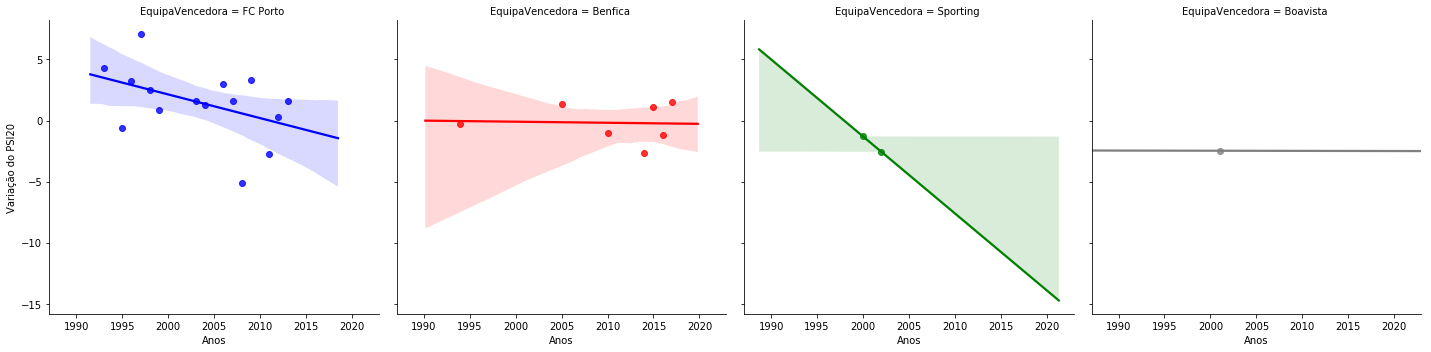

In [28]:
g1 = sns.lmplot(x='Ano', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25.reset_index(), palette=cores)\
    .set_axis_labels('Anos', 'Taxa de Crescimento Real do PIB (%)')\
    .savefig('25anos_parCresPIB_Tempo.png', transparent=True, bbox_inches='tight')

g2 = sns.lmplot(x='Ano', y='Consumo_Privado_em_Pct_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25.reset_index(), palette=cores)\
    .set_axis_labels('Anos', 'Consumo Privado (% do PIB)')\
    .savefig('25anos_parConsumo_Tempo.png', transparent=True, bbox_inches='tight')

g3 = sns.lmplot(x='Ano', y='DesempregoPCT_Total', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25.reset_index(), palette=cores)\
    .set_axis_labels('Anos', '% Desemprego')\
    .savefig('25anos_parDesemprego_Tempo.png', transparent=True, bbox_inches='tight')

g4 = sns.lmplot(x='Ano', y='PSI20_Variacao10x', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data25.reset_index(), palette=cores)\
    .set_axis_labels('Anos', 'Variação do PSI20')\
    .savefig('25anos_parVarPSI20_Tempo.png', transparent=True, bbox_inches='tight')

## II.3. Dataset truncado a 19 anos de dados

Iremos truncar os dados a **19 anos** com base nas restantes variáveis. Queremos confirmar se estas têm alguma correlação com o que pretendemos descobrir.

Analizando os missing values verificamos a necessidade de efectuar algumas truncagens no dataset.
O principal alvo será o Tx_Cresc_Real_PIB juntamente com as variáveis do PIB.

In [29]:
dataset_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1961 to 2018
Data columns (total 12 columns):
EquipaVencedora                     58 non-null object
Tx_Cresc_Real_PIB                   58 non-null float64
TotalPop_Log                        57 non-null float64
Euribor 3 meses                     19 non-null float64
Euribor 6 meses                     19 non-null float64
Euribor 12 meses                    19 non-null float64
PSI20_Variacao10x                   26 non-null float64
RendDisponivelPCT_PIB               57 non-null float64
Consumo_Privado_em_Pct_PIB          57 non-null float64
Inflacao_Total                      41 non-null float64
Inflacao_Lazer_recreação_cultura    41 non-null float64
DesempregoPCT_Total                 36 non-null float64
dtypes: float64(11), object(1)
memory usage: 5.9+ KB


Truncamos à variação do PSI20, de seguida verificando mais variáveis cuja densidade de missing values é superior ao desejável encontramos as seguintes com um cutoff de < 3% em missing values do dataset global:

In [30]:
clean_data19 = dataset_F[~dataset_F['Euribor 3 meses'].isnull()].copy()
clean_data19.drop(clean_data19.columns[clean_data19.isna().sum() > len(clean_data19)*0.03], axis=1, inplace=True)
clean_data19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1999 to 2017
Data columns (total 12 columns):
EquipaVencedora                     19 non-null object
Tx_Cresc_Real_PIB                   19 non-null float64
TotalPop_Log                        19 non-null float64
Euribor 3 meses                     19 non-null float64
Euribor 6 meses                     19 non-null float64
Euribor 12 meses                    19 non-null float64
PSI20_Variacao10x                   19 non-null float64
RendDisponivelPCT_PIB               19 non-null float64
Consumo_Privado_em_Pct_PIB          19 non-null float64
Inflacao_Total                      19 non-null float64
Inflacao_Lazer_recreação_cultura    19 non-null float64
DesempregoPCT_Total                 19 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.9+ KB


### II.3.1. Criação do Dataset a 19 anos com dummies
Transformar a variável categórica da equipa vencedora em dummies para melhor conseguir correlacionar, será uma abordagem a não descartar. Após esta abordagem, limitamos os missing values aos dados que temos ficando um dataset limpo com **19 épocas** ao todo.

In [31]:
d_equipas = pd.get_dummies(clean_data19.EquipaVencedora).rename(columns=lambda x: 'EquipaVencedora_' + str(x).replace(' ','')).astype(int)
clean_data19_d = pd.concat([clean_data19, d_equipas], axis=1)
clean_data19_d.drop(['EquipaVencedora', 'EquipaVencedora_Boavista'], inplace=True, axis=1)
clean_data19.rename(columns=lambda x: str(x).replace(' ',''), inplace=True)
clean_data19_d.rename(columns=lambda x: str(x).replace(' ',''), inplace=True)

### II.3.2. Visualização Dados a 19 anos
Iremos verificar a correlação global entre as variáveis no periodo seleccionado de 19 anos, juntando também as variáveis dummies das equipas vencedoras

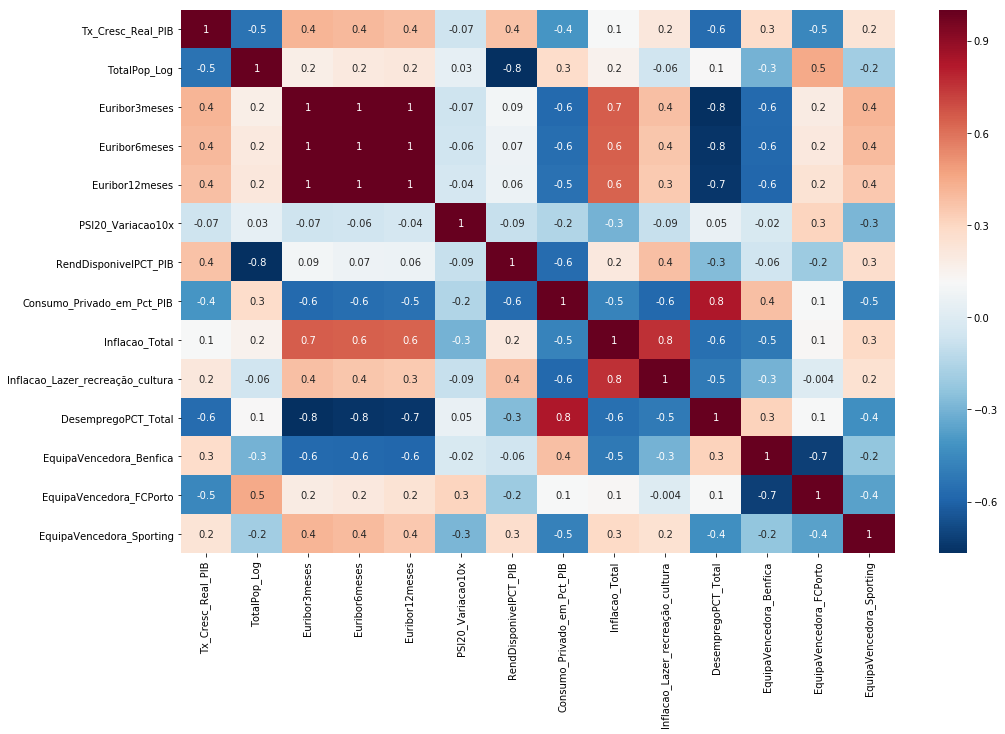

In [32]:
corr_d = clean_data19_d.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(corr_d, annot=True, fmt = '.1g', cmap="RdBu_r")\
    .get_figure().savefig('19anos_heatmap.png', transparent=True, bbox_inches='tight')
plt.show()

Iremos verificar a correlação global entre as variáveis no periodo seleccionado de 19 anos, num formato gráfico a fim de perceber melhor as correlações do ponto anterior.

<Figure size 1152x720 with 0 Axes>

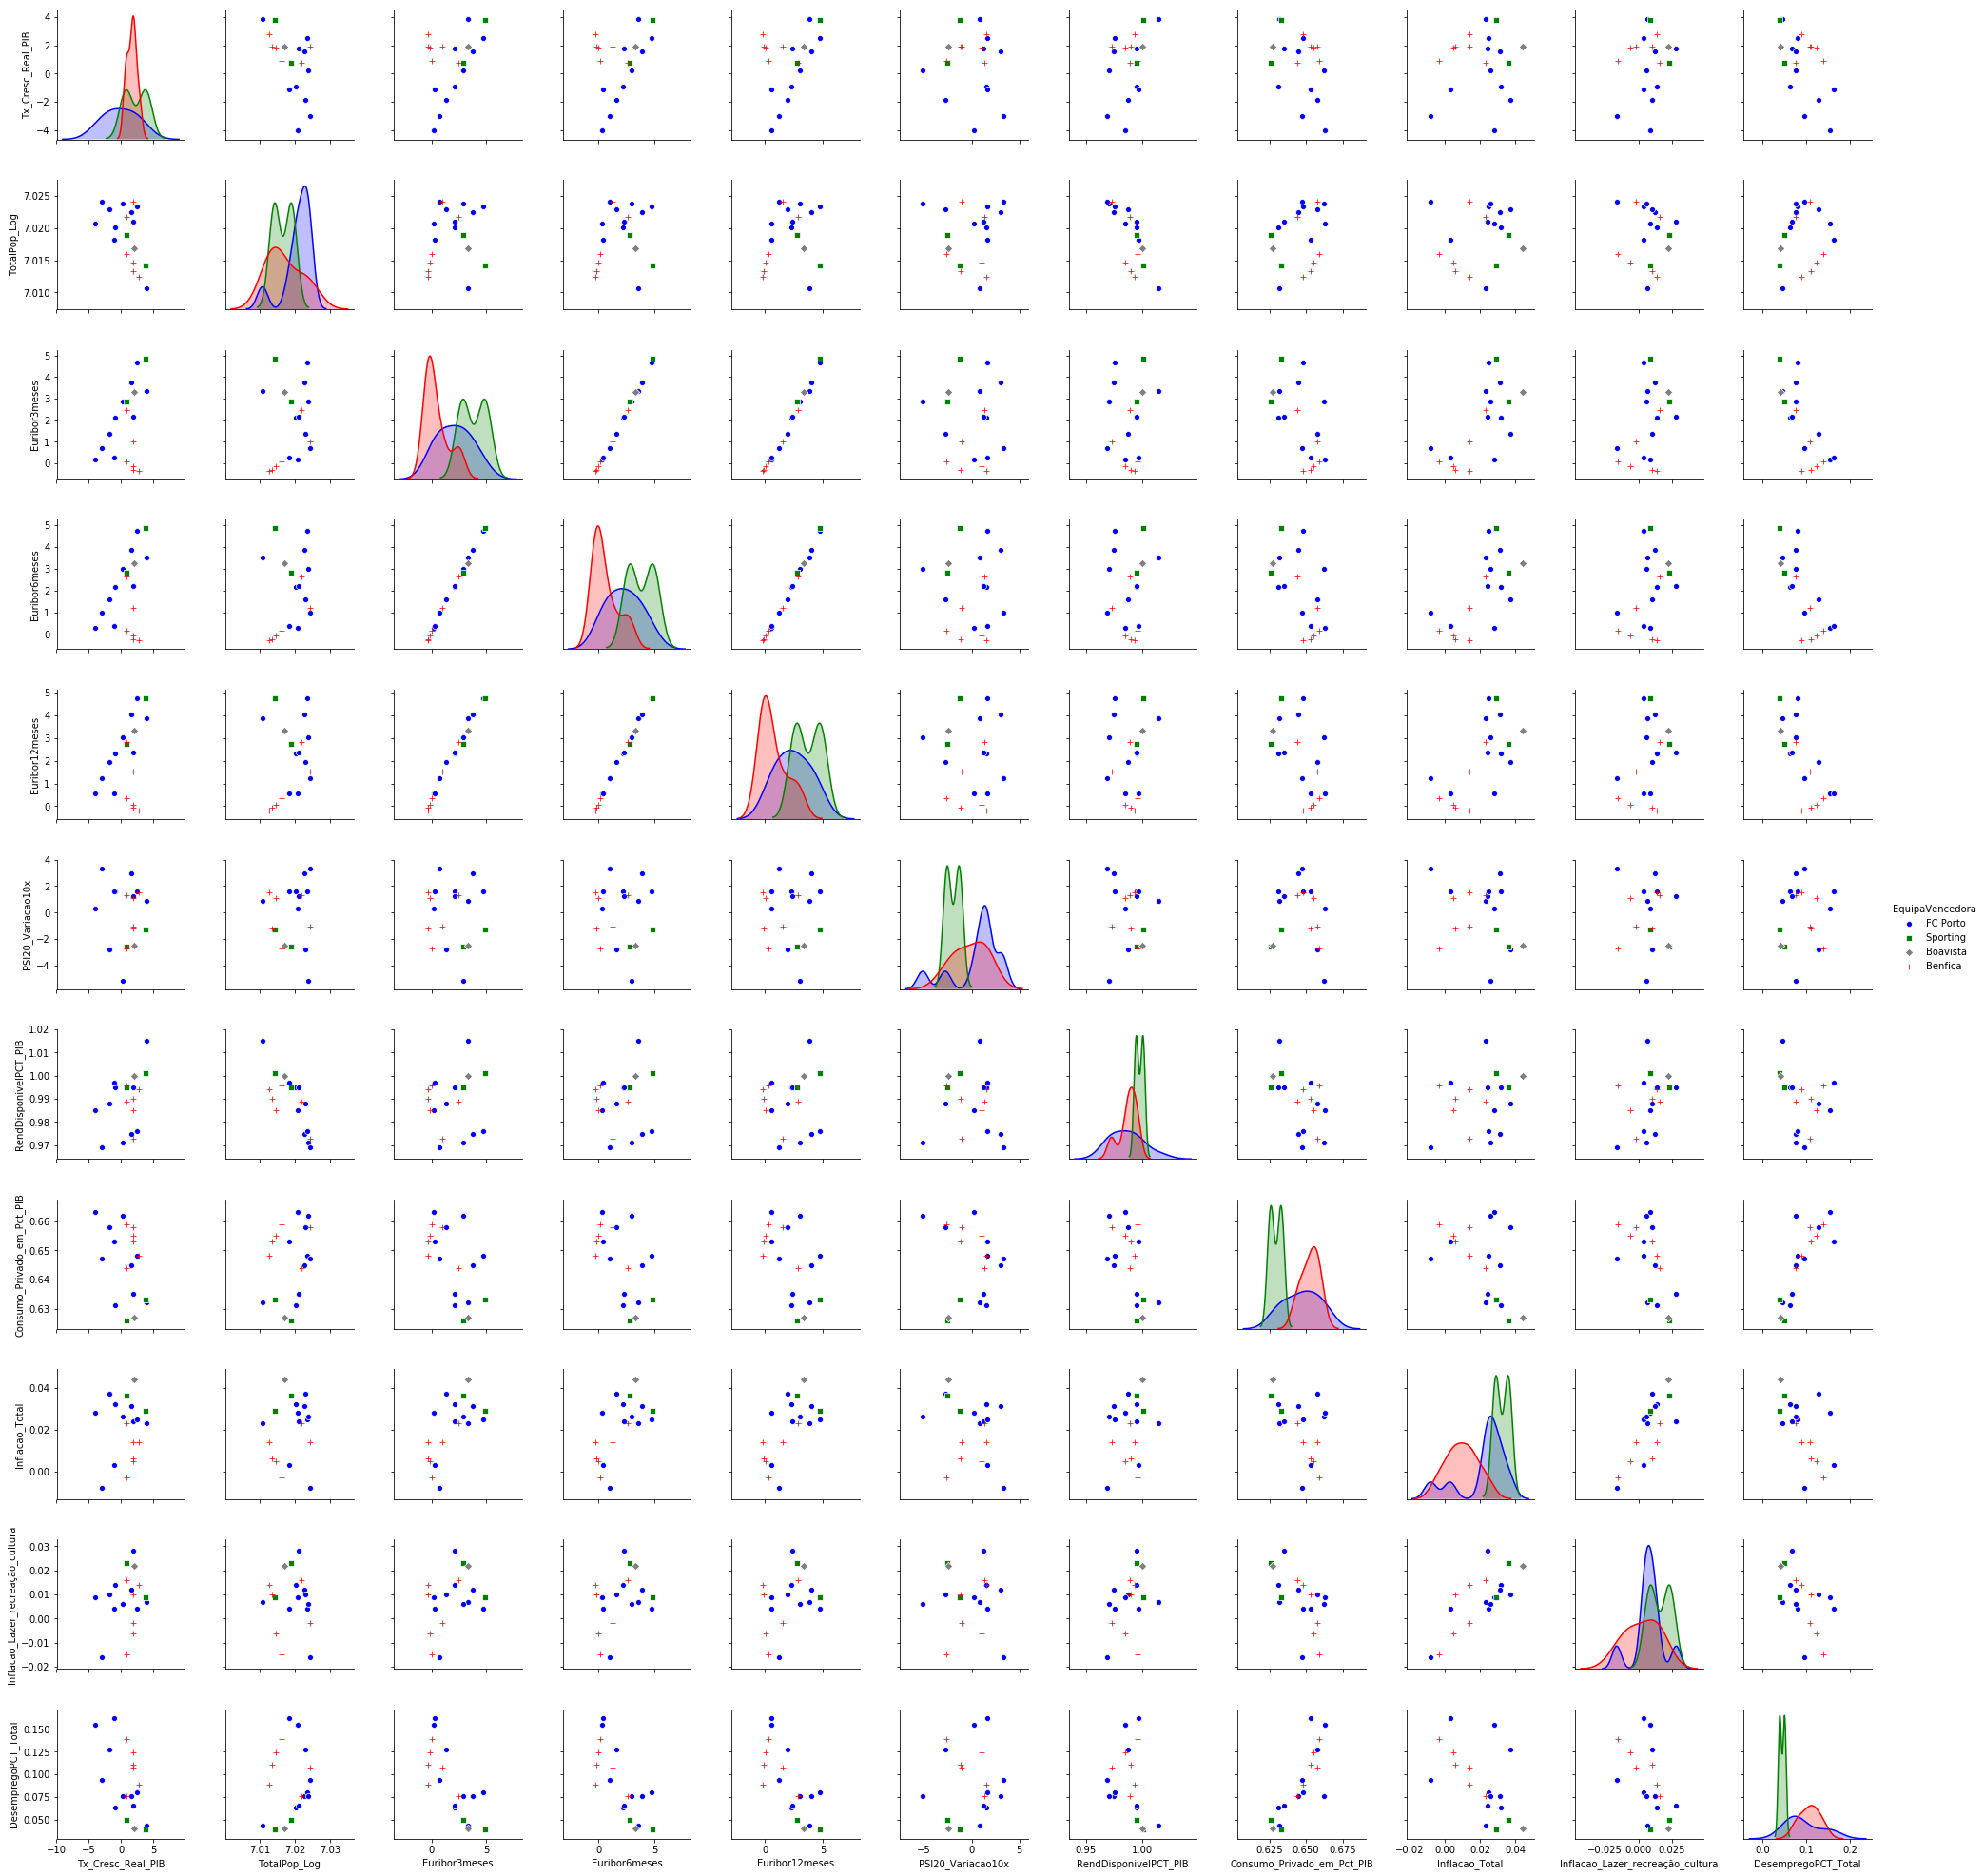

In [33]:
figure = plt.figure(figsize=(16,10))
cores = {'Sporting ':'g','Benfica ':'r','FC Porto ':'b','Boavista ':'grey'}
sns.pairplot(clean_data19, hue='EquipaVencedora', palette=cores, kind='scatter', markers=["o", "s", "D", "+"])\
    .savefig('19anos_pairplot.png', transparent=True, bbox_inches='tight')
plt.show()

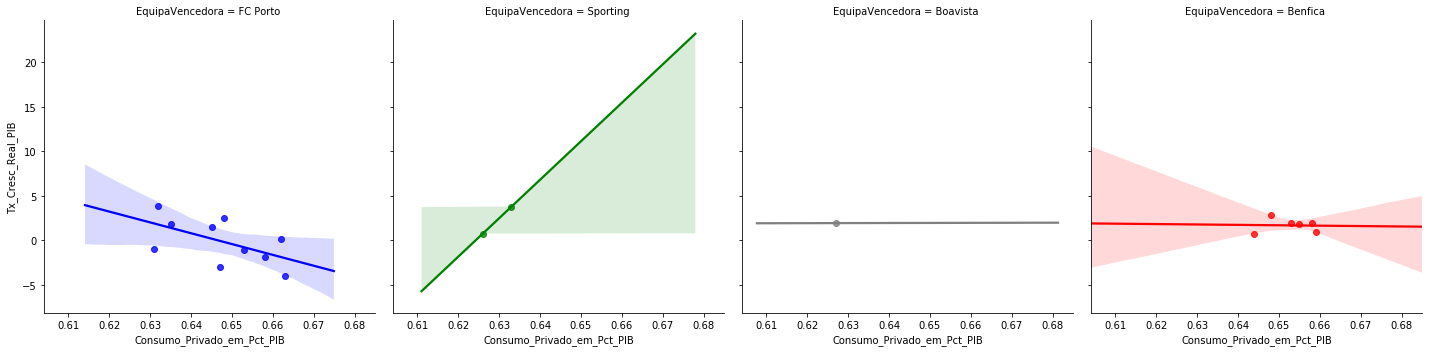

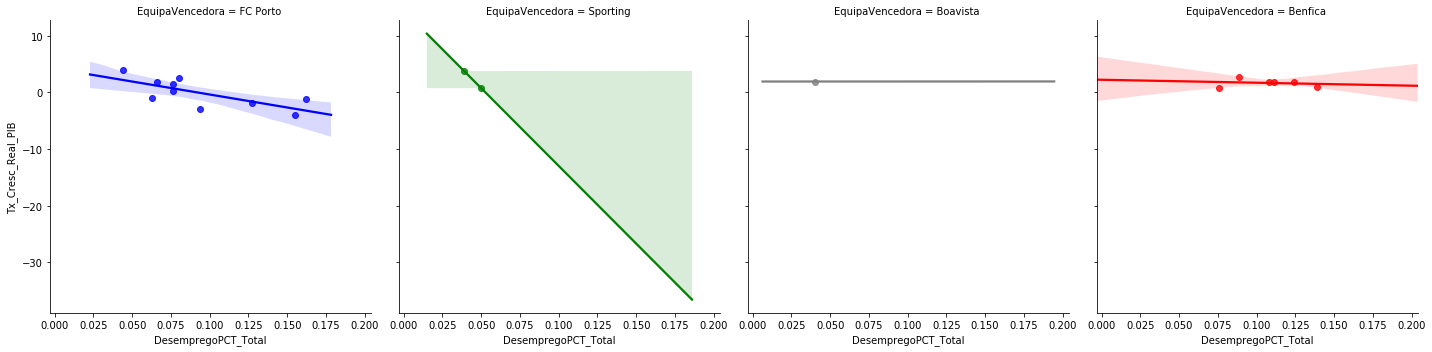

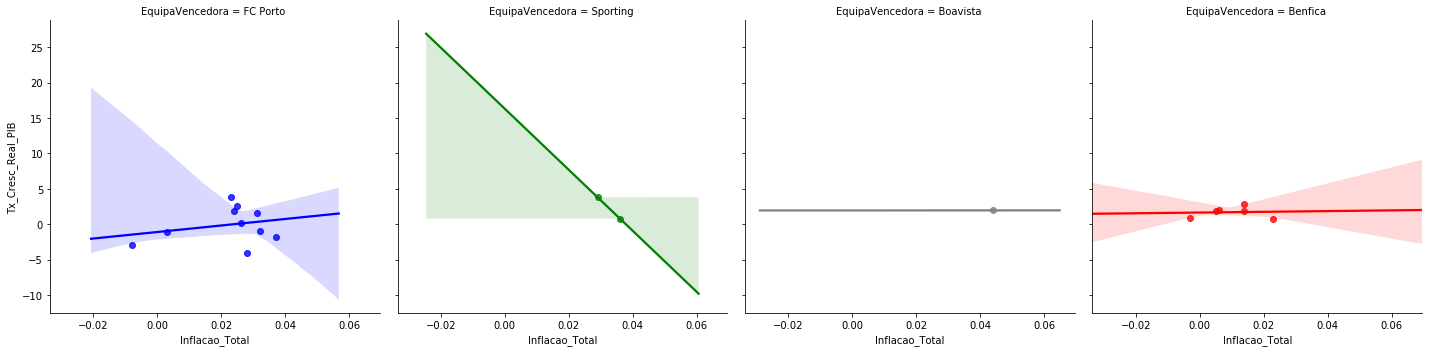

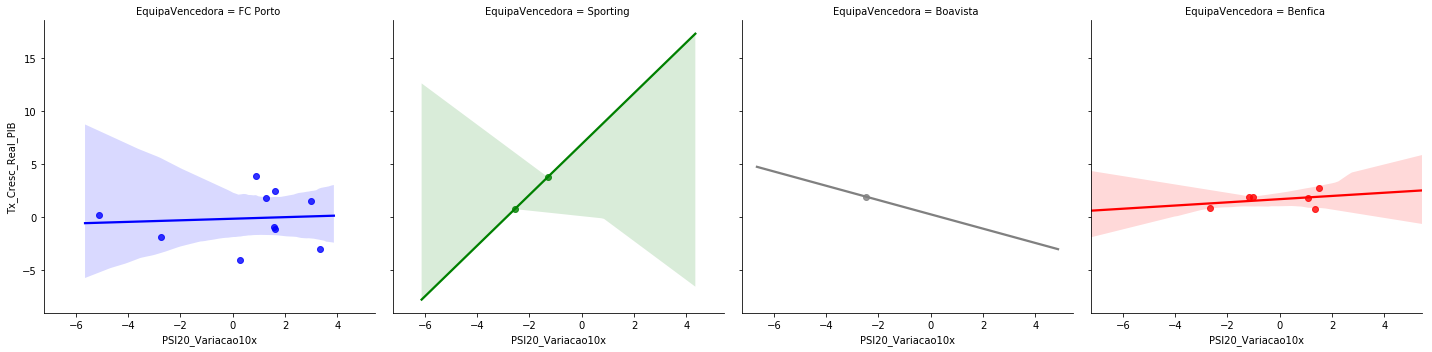

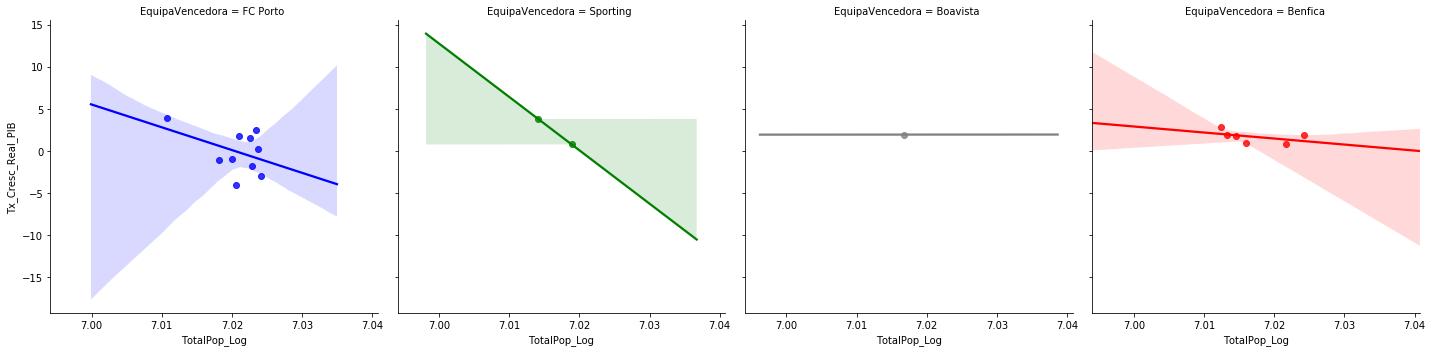

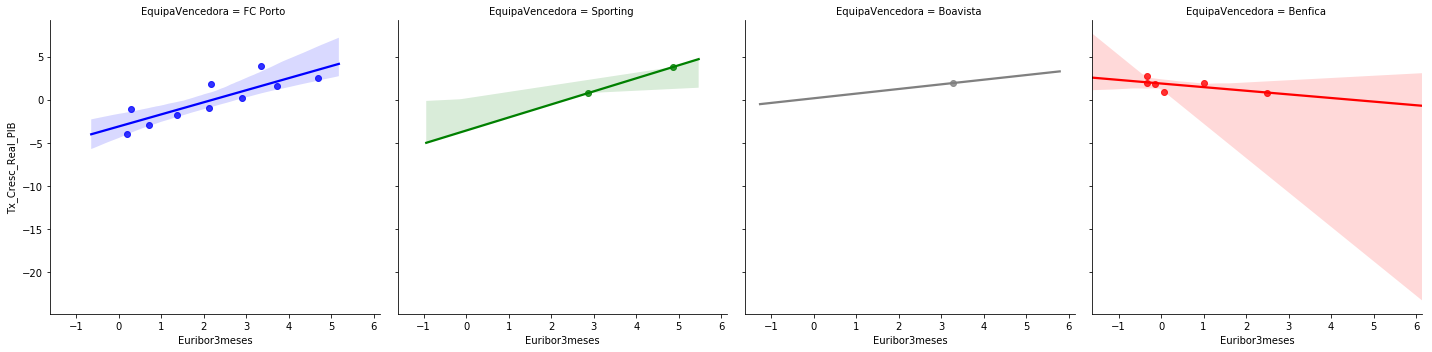

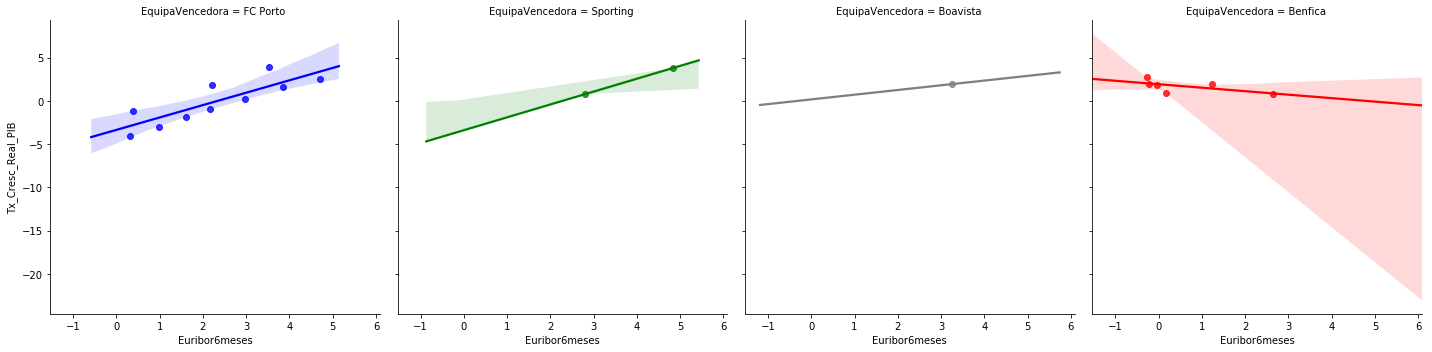

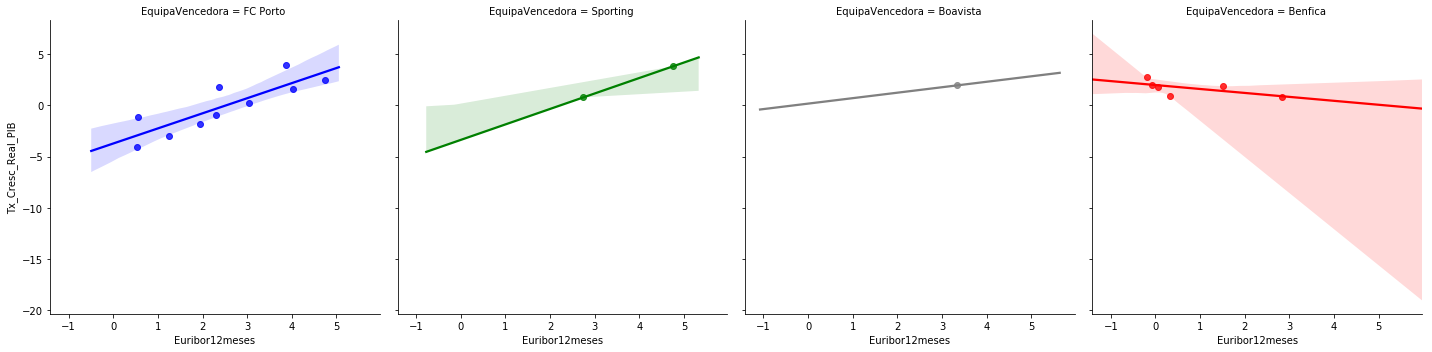

In [34]:
g1 = sns.lmplot(x='Consumo_Privado_em_Pct_PIB', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parConsumo.png', transparent=True, bbox_inches='tight')

g2 = sns.lmplot(x='DesempregoPCT_Total', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parDesemprego.png', transparent=True, bbox_inches='tight')

g3 = sns.lmplot(x='Inflacao_Total', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parInflacao.png', transparent=True, bbox_inches='tight')

g4 = sns.lmplot(x='PSI20_Variacao10x', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parVarPSI20.png', transparent=True, bbox_inches='tight')

g5 = sns.lmplot(x='TotalPop_Log', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parTotalPop.png', transparent=True, bbox_inches='tight')

g6 = sns.lmplot(x='Euribor3meses', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parEuribor3.png', transparent=True, bbox_inches='tight')

g7 = sns.lmplot(x='Euribor6meses', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parEuribor6.png', transparent=True, bbox_inches='tight')

g8 = sns.lmplot(x='Euribor12meses', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19, palette=cores)\
    .savefig('19anos_parEuribor12.png', transparent=True, bbox_inches='tight')

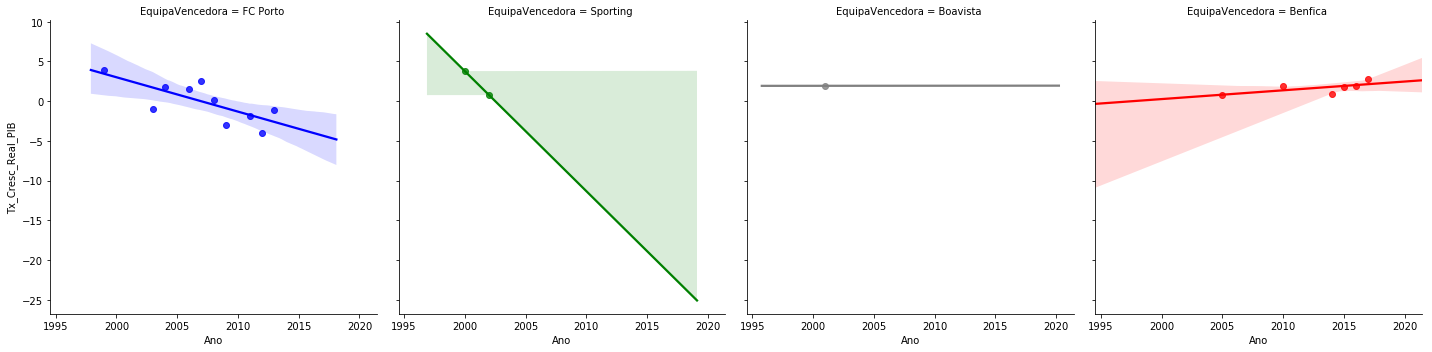

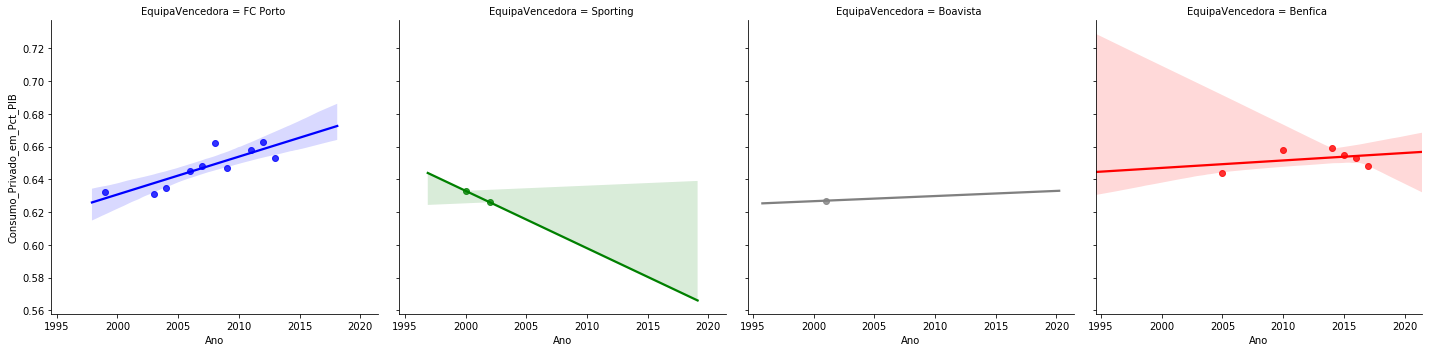

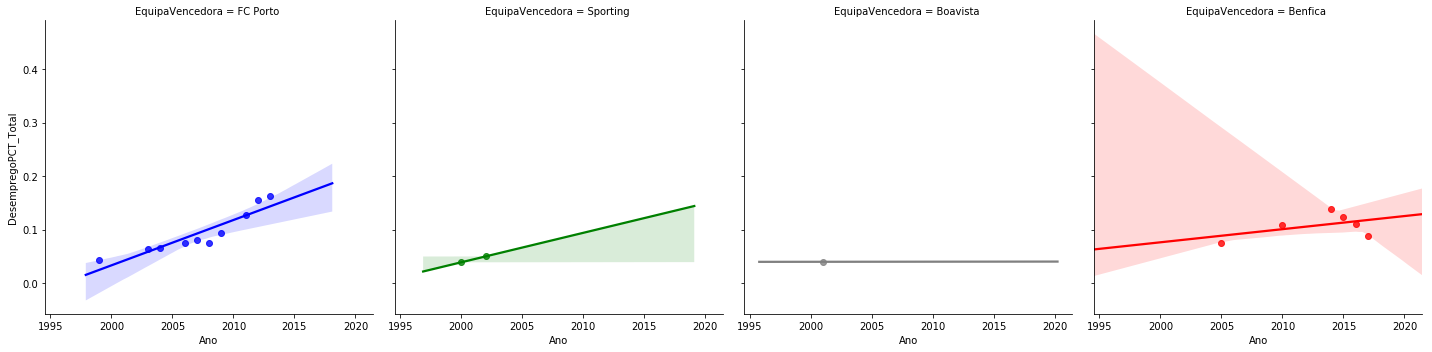

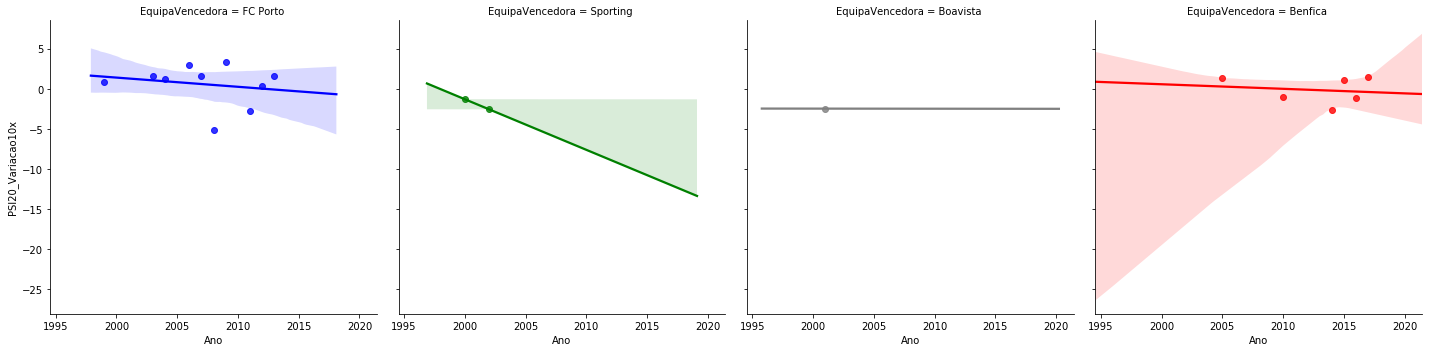

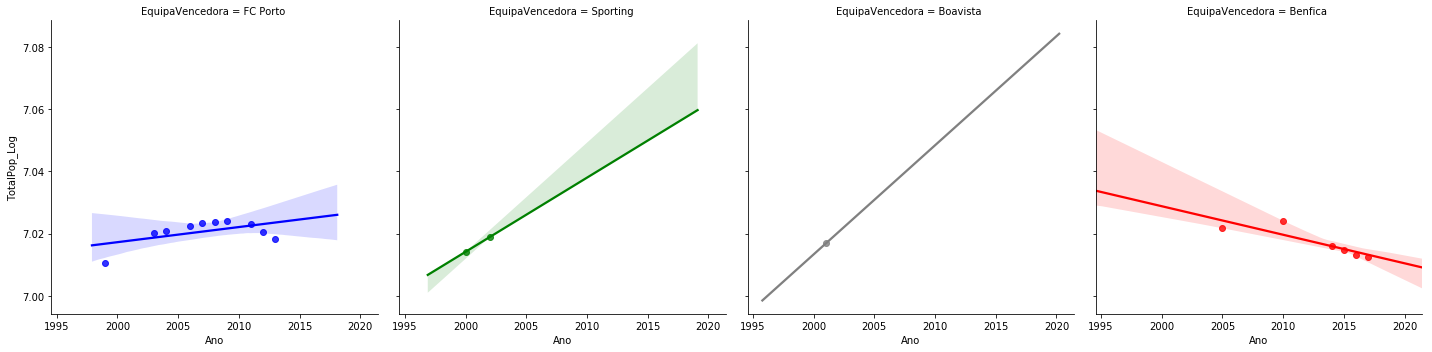

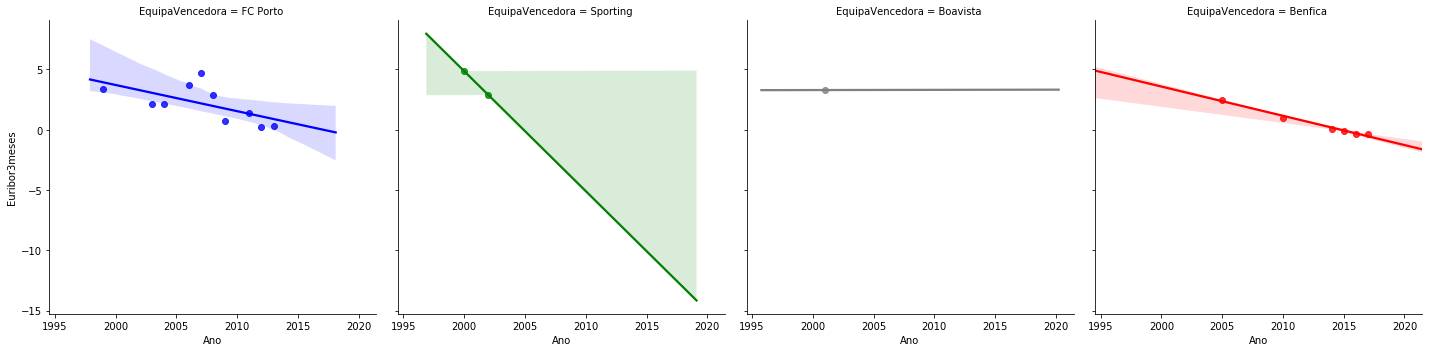

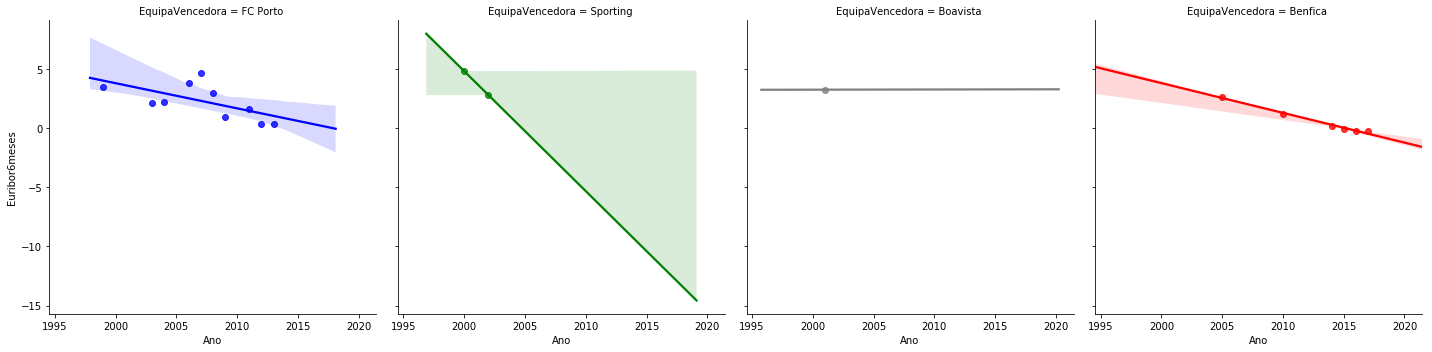

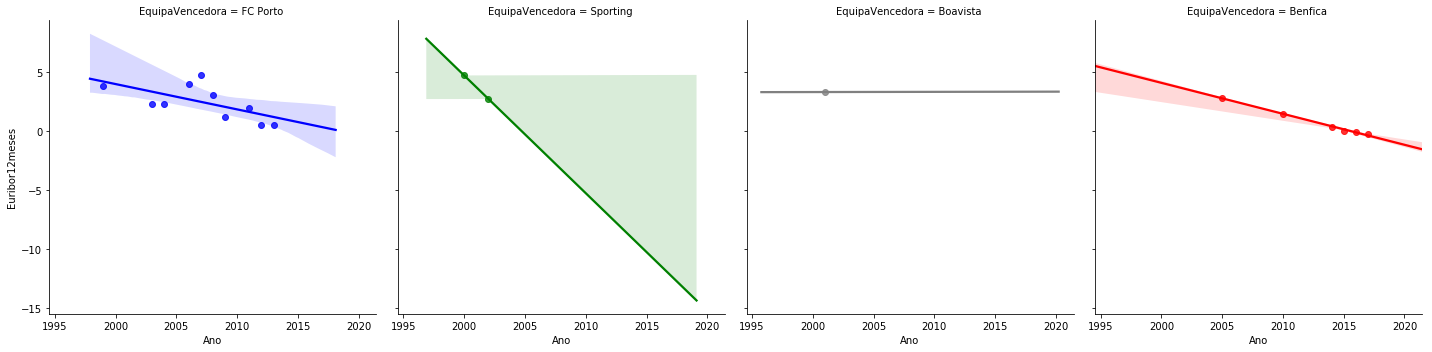

In [35]:
g = sns.lmplot(x='Ano', y='Tx_Cresc_Real_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parCrescPIB_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='Consumo_Privado_em_Pct_PIB', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parConsumo_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='DesempregoPCT_Total', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parDesemprego_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='PSI20_Variacao10x', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parPSI20Var_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='TotalPop_Log', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parTotalPop_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='Euribor3meses', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parEuribor3_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='Euribor6meses', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parEuribor6_Tempo.png', transparent=True, bbox_inches='tight')

g = sns.lmplot(x='Ano', y='Euribor12meses', col='EquipaVencedora', hue='EquipaVencedora', 
               data=clean_data19.reset_index(), palette=cores)\
    .savefig('19anos_parEuribor6_Tempo.png', transparent=True, bbox_inches='tight')

## III. Modelação e afinação de modelos

Podemos tirar algumas ideias a seguir eventualmente para o nosso objectivo final: que é tentar explicar a variação do PIB de um ponto de vista global, ou com uma perspectiva histórica dos dataframes que seleccionamos. Para isso, provavelmente teremos de construir um de dois tipos de modelos:

1. Um modelo global e independente do tempo;
2. um modelo em série de tempo que terá em conta não só as suas variaveis mas também a influencia que estas podem ter de anos anteriores nos anos seguintes

Também não nos podemos esquecer que a nossa variável alvo, a Taxa de crescimento do PIB, pode ser muito influenciada por outros dados que não temos ao nosso dispor e que podem diminuir a robustez de qualquer conclusão do nosso estudo. 

In [36]:
# Carregamento das libraries a usar na criação, teste e diagnóstico dos modelos
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import scipy.stats as stats 
import sklearn.preprocessing as pre

# funções reutilizadas e adaptadas de https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/ 
####### A BIG THANK YOU #######
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, model_leverage.max()+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, model_leverage.max(), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, model_leverage.max(), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

In [37]:
#Função com o objectivo de resumir alguns dos pontos 
# importantes para escolher um modelo OLS de StatsModels de uma lista de modelos
def resumo_modelos(modelos):
    rsquaredadj = []
    fvalues = []
    fpvalues = []
    condition_n = []
    nnSigParam = []
    DurbWats = []
    for model in modelos:
        fvalues.append((model.fvalue))
        fpvalues.append((model.f_pvalue))
        rsquaredadj.append((model.rsquared_adj))
        condition_n.append((model.condition_number))
        DurbWats.append((float(model.summary().tables[2].data[0][3])))
        i=0
        for v in list(model.pvalues):
            if v > 0.05:
                  i+=1;
        nnSigParam.append((i))

    anova_m = sm.stats.anova_lm(modelos[0], modelos[1], modelos[2], modelos[3], modelos[4], modelos[5], typ=1)
    ind_extra = pd.DataFrame({'rsquaredadj':rsquaredadj, 'fvalues':fvalues, 'fpvalues':fpvalues, 'condition_n':condition_n, 'nnSigParam':nnSigParam, 'DurbWats':DurbWats})
    diagnostico = pd.concat([anova_m, ind_extra], axis=1).reset_index()
    diagnostico.rename(columns={'index':'Nr_Modelo'}).set_index('Nr_Modelo').to_clipboard(excel=True, sep=None)
    return diagnostico.rename(columns={'index':'Nr_Modelo'}).set_index('Nr_Modelo')

### III.1. Modelos 57 anos

Para o modelo inicial iremos começar por inlcuir as variáveis que nos pareceram mais relevantes para explicar a taxa de crescimento do PIB tendo em conta as equipas que ganharam os últimos 56 campeonatos. Iremos retirar o dummie relativo ao **Boavista**.

In [38]:
modelo57_0 = ols('Tx_Cresc_Real_PIB ~ EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting -1',
                clean_data57_d).fit()

In [39]:
modelo57_1 = ols('(Tx_Cresc_Real_PIB) ~ Consumo_Privado_em_Pct_PIB + EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data57_d).fit()

In [40]:
modelo57_2 = ols('(Tx_Cresc_Real_PIB) ~ RendDisponivelPCT_PIB + Consumo_Privado_em_Pct_PIB +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data57_d).fit()

In [41]:
modelo57_3 = ols('(Tx_Cresc_Real_PIB) ~ TotalPop_Log : Consumo_Privado_em_Pct_PIB + RendDisponivelPCT_PIB +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data57_d).fit()

In [42]:
modelo57_4 = ols('(Tx_Cresc_Real_PIB) ~ TotalPop_Log : Consumo_Privado_em_Pct_PIB + RendDisponivelPCT_PIB +\
                EquipaVencedora_Benfica',
                clean_data57_d).fit()

In [43]:
modelo57_5 = ols('(Tx_Cresc_Real_PIB) ~ TotalPop_Log : RendDisponivelPCT_PIB',
                clean_data57_d).fit()

In [44]:
resumo_modelos([modelo57_0, modelo57_1, modelo57_2, modelo57_3, modelo57_4, modelo57_5])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F),rsquaredadj,fvalues,fpvalues,condition_n,nnSigParam,DurbWats
Nr_Modelo,,,,,,,,,,,,
0,54.0,601.428516,0.0,NaN,NaN,NaN,0.484733,18.874116,1.685627e-08,1.802776,0,0.940
1,52.0,559.947580,2.0,41.480937,2.533111,0.089172,0.067199,2.008559,1.068918e-01,85.814113,5,0.921
2,51.0,408.096174,1.0,151.851406,18.546178,0.000075,0.306834,5.957742,2.061965e-04,128.899311,5,1.120
3,51.0,403.233939,-0.0,4.862235,-inf,NaN,0.315093,6.152573,1.561033e-04,326.280661,5,1.121
4,53.0,417.785333,-2.0,-14.551394,0.888608,NaN,0.317155,9.669930,3.420873e-05,308.471135,2,1.198
5,55.0,450.326070,-2.0,-32.540738,1.987161,NaN,0.290734,23.954814,9.011273e-06,283.119292,0,1.156


O Modelo que nos parece mais favorável é o nº5 da lista, iremos confirmar com os plots de diagnóstico:

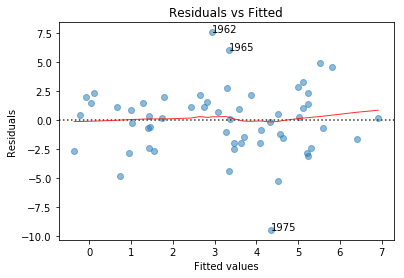

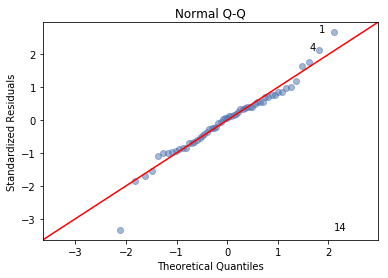

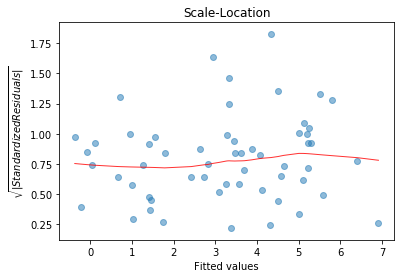

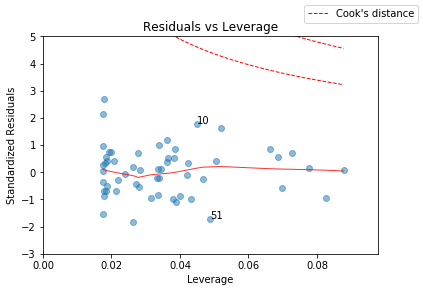

In [45]:
diagnostic_plots(clean_data57_d[['TotalPop_Log', 'RendDisponivelPCT_PIB']], clean_data57_d['Tx_Cresc_Real_PIB'], model_fit=modelo57_5)

### III.2. Modelos 25 anos

In [46]:
modelo25_0 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log + RendDisponivelPCT_PIB + Consumo_Privado_em_Pct_PIB + PSI20_Variacao10x +\
                Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data25_d).fit()

In [47]:
modelo25_1 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log + PSI20_Variacao10x +\
                Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto',
                clean_data25_d).fit()

In [48]:
modelo25_2 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log + PSI20_Variacao10x +\
                Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total + EquipaVencedora_Benfica',
                clean_data25_d).fit()

In [49]:
modelo25_3 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log + PSI20_Variacao10x +\
                Inflacao_Total + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto',
                clean_data25_d).fit()

In [50]:
modelo25_4 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log * Consumo_Privado_em_Pct_PIB + Inflacao_Total + DesempregoPCT_Total +\
                EquipaVencedora_Benfica',
                clean_data25_d).fit()

In [51]:
modelo25_5 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : DesempregoPCT_Total',
                clean_data25_d).fit()

In [52]:
resumo_modelos([modelo25_0, modelo25_1, modelo25_2, modelo25_3, modelo25_4, modelo25_5])

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F),rsquaredadj,fvalues,fpvalues,condition_n,nnSigParam,DurbWats
Nr_Modelo,,,,,,,,,,,,
0,14.0,44.998855,0.0,NaN,NaN,NaN,0.354293,2.316858,0.073456,2.990940e+04,11,2.044
1,17.0,46.014752,-3.0,-1.015897,0.094799,NaN,0.456237,3.876691,0.010586,9.895800e+03,5,2.023
2,18.0,46.036048,-1.0,-0.021296,0.005962,NaN,0.486208,4.785250,0.004409,9.859888e+03,4,2.022
3,18.0,48.722606,-0.0,-2.686558,inf,NaN,0.456224,4.355972,0.006901,8.561811e+03,3,1.805
4,18.0,33.530331,-0.0,15.192276,-inf,NaN,0.625780,7.688894,0.000332,1.112800e+06,1,2.100
5,23.0,82.158037,-5.0,-48.627706,2.722648,NaN,0.282397,10.444687,0.003687,5.637358e+00,0,1.105


O modelo que parece ser mais favorável é o modelo nº5 apesar deste ter muito maior SSR que os restantes modelos, mas se verificarmos as condições LINE dos resíduos, o melhor modelo é o nº4:

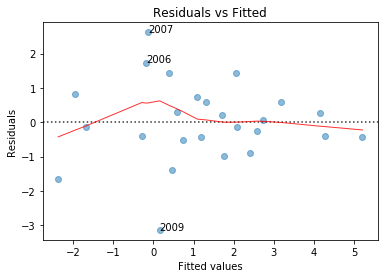

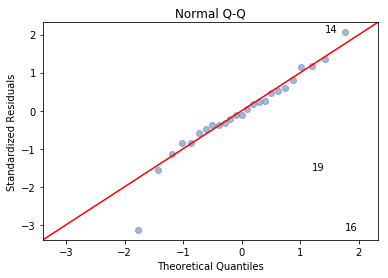

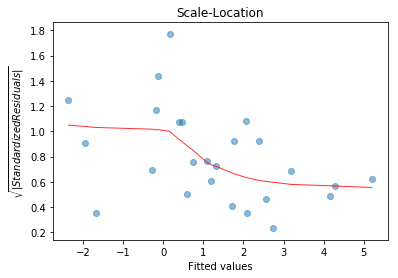

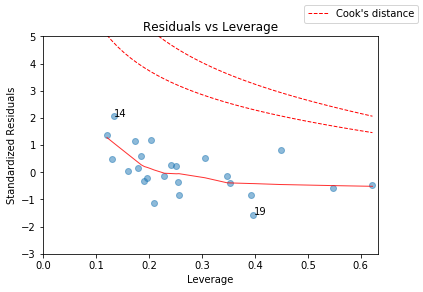

In [53]:
# Análise de resíduos do modelo nº 4
diagnostic_plots(clean_data25_d[['TotalPop_Log','DesempregoPCT_Total', 'Inflacao_Total', 'EquipaVencedora_Benfica']],
                 clean_data25_d['Tx_Cresc_Real_PIB'], model_fit=modelo25_4)

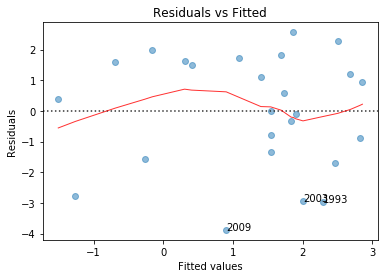

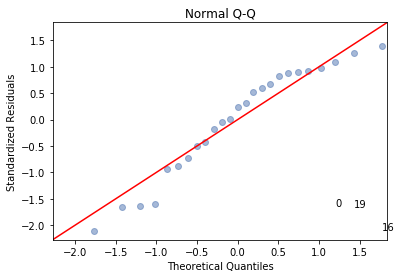

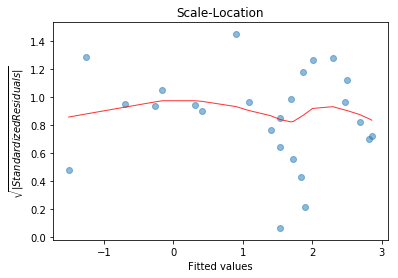

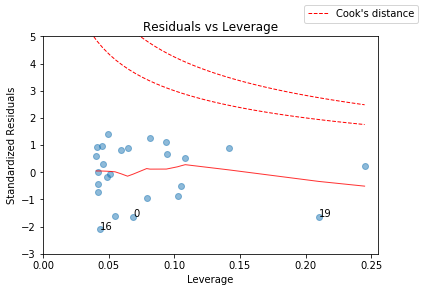

In [54]:
# Análise de resíduos do modelo nº5
diagnostic_plots(clean_data25_d[['TotalPop_Log','DesempregoPCT_Total']],
                 clean_data25_d['Tx_Cresc_Real_PIB'], model_fit=modelo25_5)

### III.3. Modelos 19 anos

In [55]:
modelo19_0 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB + TotalPop_Log : Consumo_Privado_em_Pct_PIB + PSI20_Variacao10x +\
                Euribor3meses + Euribor6meses + Euribor12meses +\
                Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data19_d).fit()

In [56]:
modelo19_1 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB + PSI20_Variacao10x +\
                Euribor3meses + Euribor6meses + Euribor12meses +\
                Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data19_d).fit()

In [57]:
modelo19_2 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB + PSI20_Variacao10x +\
                Euribor3meses + Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica + EquipaVencedora_FCPorto + EquipaVencedora_Sporting',
                clean_data19_d).fit()

In [58]:
modelo19_3 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB + PSI20_Variacao10x +\
                Euribor3meses + Inflacao_Total + Inflacao_Lazer_recreação_cultura + DesempregoPCT_Total +\
                EquipaVencedora_Benfica',
                clean_data19_d).fit()

In [59]:
modelo19_4 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB +\
                Euribor3meses + Inflacao_Total + DesempregoPCT_Total +\
                EquipaVencedora_Benfica',
                clean_data19_d).fit()

In [60]:
modelo19_5 = ols('Tx_Cresc_Real_PIB ~ TotalPop_Log : RendDisponivelPCT_PIB +\
                Euribor3meses +\
                EquipaVencedora_Benfica',
                clean_data19_d).fit()

In [61]:
resumo_modelos([modelo19_0, modelo19_1, modelo19_2, modelo19_3, modelo19_4, modelo19_5])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, 

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F),rsquaredadj,fvalues,fpvalues,condition_n,nnSigParam,DurbWats
Nr_Modelo,,,,,,,,,,,,
0,6.0,16.441523,0.0,NaN,NaN,NaN,0.408330,2.035198,0.197000,3395.823182,13,2.580
1,7.0,19.153095,-1.0,-2.711572,1.581291,NaN,0.409215,2.133449,0.161944,2071.284236,12,2.293
2,9.0,20.317695,-2.0,-1.164600,0.339576,NaN,0.512561,3.103076,0.053467,1672.944355,9,2.337
3,11.0,20.690994,-2.0,-0.373298,0.108847,NaN,0.593859,4.759935,0.011004,1625.560749,6,2.344
4,13.0,21.852102,-2.0,-1.161108,0.338558,NaN,0.637057,7.318914,0.001830,771.314509,4,2.553
5,15.0,25.721755,-2.0,-3.869653,1.128321,NaN,0.629748,11.205162,0.000409,654.059641,0,2.269


O modelo mais favorável é o 5º modelo, não obstante é o que tem maior SSR e onde é perceptivel a não constatação dos critérios LINE dos resíduos:

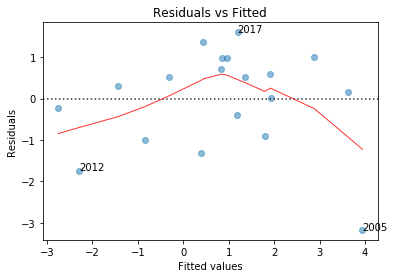

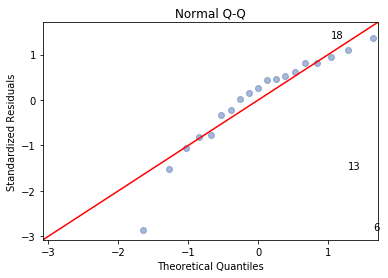

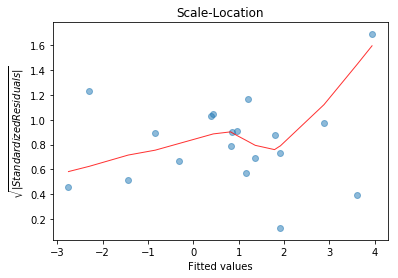

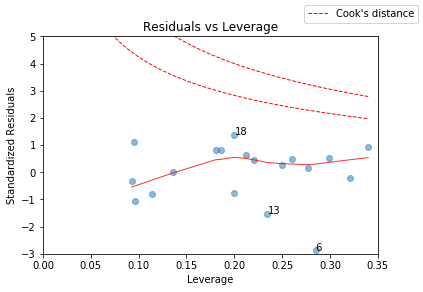

In [62]:
diagnostic_plots(clean_data19_d[['TotalPop_Log', 'RendDisponivelPCT_PIB', 'Euribor3meses', 'EquipaVencedora_Benfica']], clean_data19_d['Tx_Cresc_Real_PIB'],
                model_fit=modelo19_5)

### III.4. Resumo
Os melhores modelos de cada dataset foram os seguintes

In [63]:
# Para o dataset a 57 anos:
modelo57_5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-68.6701,14.690,-4.675,0.000,-98.110,-39.230
TotalPop_Log:RendDisponivelPCT_PIB,10.0349,2.050,4.894,0.000,5.926,14.144


In [64]:
# Para o dataset a 25 anos:
modelo25_4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.477e+04,1.94e+04,2.828,0.011,1.41e+04,9.55e+04
TotalPop_Log,-7802.6778,2760.648,-2.826,0.011,-1.36e+04,-2002.772
Consumo_Privado_em_Pct_PIB,-8.328e+04,2.99e+04,-2.785,0.012,-1.46e+05,-2.05e+04
TotalPop_Log:Consumo_Privado_em_Pct_PIB,1.186e+04,4261.237,2.784,0.012,2912.037,2.08e+04
Inflacao_Total,-28.9636,26.045,-1.112,0.281,-83.681,25.754
DesempregoPCT_Total,-36.7339,15.417,-2.383,0.028,-69.125,-4.343
EquipaVencedora_Benfica,1.6241,0.750,2.166,0.044,0.049,3.199


In [65]:
# Para o dataset a 19 anos:
modelo19_5.summary().tables[1]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-66.0167,26.736,-2.469,0.026,-123.004,-9.030
TotalPop_Log:RendDisponivelPCT_PIB,9.1861,3.854,2.384,0.031,0.972,17.400
Euribor3meses,1.0578,0.223,4.743,0.000,0.582,1.533
EquipaVencedora_Benfica,3.5331,0.789,4.477,0.000,1.851,5.215


Segundo os critérios:
1. Linear relationship
2. Multivariate normality
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity

https://www.statisticssolutions.com/assumptions-of-linear-regression/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/

No modelo a 57 anos não conseguimos imputar o facto de alguma equipa ganhar o campeonato a uma variação do PIB nacional.

Nos modelos a 25 e 19 anos, apesar de a nossa fórmula incluir, com nivel de significancia estatística, um impacto positivo quando o benfica ganha o campeonato, já olhando para os critérios LINE no caso dos resíduos, não conseguimos comprovar que estes dois modelos expliquem a verdadeira variação do PIB.

Em qualquer um dos modelos seleccionados como os melhores de cada dataset, não podemos excluir a multicolinearidade totalmente.

Com isto podemos inferir que podemos não ter o melhor conjunto de variáveis, ter variáveis de confundimento nos nossos modelos, ou mesmo o modelo de regressão errado. A hipotese de analisar os mesmos dados numa série temporal não deve ser descartada também.